# NBA Prediction Modeling

## Luke DiPerna

### August 2023

![basket_splash_image](basket_splash_image.jpg)

<!-- Photo by <a href="https://unsplash.com/@markusspiske?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Markus Spiske</a> on <a href="https://unsplash.com/photos/BfphcCvhl6E?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a> -->

## Project Goal

The purpose of this project is to create a model that can accurately predict the outcome of NBA games. The stakeholder is a start-up sports news and entertainment website Stat-Ball. The site wants to have contests and events for users to participate in, including for-fun betting on NBA games. In order to do this, the company wants to create an in-house model that users can compete against, with prizes for the best performances. My task is to try and create the best possible model, given a set of guidelines and limitations from Stat-Ball.

My tasks are as follows:

* gather all player and team boxscore data from the past 10 NBA seasons.
* process the data and prepare it for modeling.
* iterate on the modeling process until I have the best possible model given the dataset.

## Table of Contents

* [Data Overview](#Data-Overview)
    * [Data Collection](#Data-Collection)
    * [Data Aggregation](#Data-Aggregation)
    * [Data Limitations](#Data-Limitations)
    * [Data Preparation](#Data-Preparation)
* [Modeling](#Modeling)
    * [Team Four Factor: 10-game Aggregation](#Team-Four-Factor:-10-game-Aggregation)
    * [Error Modeling](#Error-Modeling)
    * [Team Four Factor: 20-game Aggregation](#Team-Four-Factor:-20-game-Aggregation)
    * [Team Four Factor: 30-game Aggregation](#Team-Four-Factor:-30-game-Aggregation)
    * [Principal Component Analysis](#Principal-Component-Analysis-(PCA))
    * [Neural Network](#Neural-Network-(NN))
    * [Elo System](#Elo-System)
* [Results](#Results)
* [Conclusion](#Conclusion)
* [Next Steps](#Next-Steps)

## Data Overview

The final versions of the datasets I will be using include team aggregated statistics for the past 10, 20, and 30 games. To see the code used to perform the data aggregation, see the [data-aggregation notebook](https://github.com/luke-lite/NBA-Prediction-Modeling/blob/7dd0df0e39e479758dc5b26affdbdd2dffc058ff/data/data-aggregation.ipynb).

### Data Collection

My first task was to gather all player and team boxscore data from each regular-season game over the past 10 seasons, as this was the maximum amount of data that could be gathered given the timeline for the project. Future iterations will likely also include playoff games, but they were omitted in this first iteration in part because historically NBA teams have been shown to perform significantly differently in the playoffs, which is why more advanced algorithms are often required to accurately predict performance. For a more in-depth discussion of this, as well as a technical breakdown of one of the gold-standard algorithms for NBA predictions, I encourage you to read about [FiveThirtyEight's RAPTOR metric](https://fivethirtyeight.com/features/how-our-raptor-metric-works/). This metric includes both boxscore data and player tracking data, which is outside of the scope of this current project, so I will need to make due with only boxscore stats.

The majority of the raw data was gathered from [basketball-reference](https://www.basketball-reference.com/), a leading site for basketball related stats. I created a web-scraper to collect the metadata, player stats, and team stats for each NBA regular season game. The web-scraper can be found on my [Github](https://github.com/luke-lite/NBA-Web-Scraper) and a beginner-friendly demonstration can be found on my [website](https://luke-lite.github.io/blog/web-scraping-basketball-stats-in-python-with-selenium-and-beautiful-soup/).

The results were put in a SQLite database that contains:

* 3 tables (game_info, player_stats, team_stats)
* 341,669 observations and 46 columns of data across 11,979 NBA games.

### Data Aggregation

The next step was to decide how best to aggregate the data from individual games. Typically, averages of each statistic are calculated by using the stats from the previous *n* number of games. There were 3 main considerations:

* How "responsive" should the data be?
* Is team data or player data more effective for predicting outcomes?
* Which features are the most effective?

#### Responsiveness

"Responsiveness" means how much importance should be put on recent performance. For example, when trying to decide whether team A or team B will win, I can use the team stats from their previous game to make a prediction. But relying on only the previous game's stats will mean the resulting models are far less robust and more susceptible to outliers, since any time a team has a particularly good performance, the models are likely to assume a win in their next game, even if the team's nine previous games were all terrible. After a bit of research, the best performing data tends to account for around the previous 20-30 games. Because of this, I decided to compare model performance when looking at the average of a team's past 10, 20, and 30 games.

#### Team vs. Player Aggregation
     
For the question of player or team data, my assumption going in was that player data would lead to better performing models. However, it was unclear whether the gains in performance would be worth the extra time and computational costs. I already had the team data for each game, so combining previous game data was straightforward, but in order to aggregate data by player, I needed to get the full team roster, and for each player, find the last *n* games they had appeared in regardless of the team they played for, aggregate each individual player's past performance, then calculate the teams total performance in each statistic. This allows the models to respond more quickly to roster changes, such as injuries and trades, but it is unclear how much improvment the models will make. Due to the project timeline, player aggregated data will remain a possibility for future iterations.

#### Feature Selection

With around 35 numeric columns of data, I needed to decide how to select the most important features. Going in, I knew that some of the data would be colinear, and some would be poorly correlated with outcome prediction. It wouldn't be possible to try every combination of features, so I settled on a few key methods:

* Four Factor Data
* Principal Component Analysis
* Full dataset

The "Four Factors of Basketball Success" were proposed in the early 2000's by Dean Oliver, a leading sports statistician, and include the four most impactful boxscore stats to determine a team's win probability. The stats are effective field goal percentage (eFG%), turnover percentage (TOV%), offensive rebounding percentage (ORB%), and Free Throw rate (FTr). A more detailed description can be found [here](https://www.basketball-reference.com/about/factors.html). This is a relatively simplistic, yet proven and effective method for determining game outcomes, so it is perfect for the task at hand.

However, since I will be using modern machine learning techniques that are capable of finding their own connections in the data, I also wanted to perform tests using the full dataset. Principal Component Analysis (PCA) is a technique for reducing the dimensionality of the data by performing linear transformations that reduce the overall number of features in the dataset while still preserving the ability to describe as much of the variance in the data as possible. I also decided to use the full dataset without PCA when training a Neural Network model to see how it would handle the full list of features.

### Data Limitations

While modern basketball analysis still utilizes boxscore data, most advanced analysis also incorporates player tracking data, such as player movement and spacing. This data, however, is typically not publicly available, and given the time and resource constraints, it is outside the scope of the current project. Future iterations could also include playoff games and data from older seasons, but teams have been shown to perform differently in the playoffs, so it would require additional changes to the model to account for this.

Additionally, there are some limitations regarding team and player data aggregation. In the case of team aggregation, the data does not do a good job of accounting for changes in team rosters. In the event of a trade or injury, where a number of players are moved to new teams or removed from a team's roster, there will obviously be an immediate impact on the team's performance, but team aggregation only considers the team, not the players on the team roster. Likewise, new players entering the league, such as through the NBA draft, will have a varying impact on a team's performance, but the data has no way to account for this.

One option is to create a predictive metric that can approximate the expected contribution (or lack there of) from a player in case of a roster change, but these systems are highly specialized and require a great deal of time and additional computational costs, so they are currently outside the scope of this project.

Finally, there are implications for using only the past 10 seasons of data. Professional basketball has undergone a number of changes through it's history, largely as a result of changes in overall player skill and competitiveness, and rule changes. The modern NBA is far less physical and more offensively focused than, for example, the NBA in the 1990's. Because of this, I suspect that some of the relative weights of the data features will differ from if I had included data from previous NBA eras. It is also possible that 10 seasons is not enough data for the more abstract ML models to shine. So additional data collection is a possibility for futre project iterations.

### Data Preparation

Now that I have accesss to the individual game data, I need to prepare it for modeling. I will load all the necessary libraries, store each database table and CSV as a dataframe, then analyze the raw data in the modeling section.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

# set seed for reproducibility
seed=99

First, store each database table and CSV as a dataframe:

In [2]:
# database tables
game_info = pd.read_csv('https://raw.githubusercontent.com/luke-lite/NBA-Prediction-Modeling/main/data/game_info.csv', index_col=0)
team_stats = pd.read_csv('https://raw.githubusercontent.com/luke-lite/NBA-Prediction-Modeling/main/data/team_stats.csv', index_col=0)

# four factor data (10, 20, 30 game averages)
team_factor_10 = pd.read_csv('https://raw.githubusercontent.com/luke-lite/NBA-Prediction-Modeling/main/data/team_factor_10.csv', index_col=0)
team_factor_20 = pd.read_csv('https://raw.githubusercontent.com/luke-lite/NBA-Prediction-Modeling/main/data/team_factor_20.csv', index_col=0)
team_factor_30 = pd.read_csv('https://raw.githubusercontent.com/luke-lite/NBA-Prediction-Modeling/main/data/team_factor_30.csv', index_col=0)

# all boxscore data (10, 20, 30 game averages)
team_full_10 = pd.read_csv('https://raw.githubusercontent.com/luke-lite/NBA-Prediction-Modeling/main/data/team_full_10.csv', index_col=0)
team_full_20 = pd.read_csv('https://raw.githubusercontent.com/luke-lite/NBA-Prediction-Modeling/main/data/team_full_20.csv', index_col=0)
team_full_30 = pd.read_csv('https://raw.githubusercontent.com/luke-lite/NBA-Prediction-Modeling/main/data/team_full_30.csv', index_col=0)

Before modeling, I will take a look at the first aggregated dataset to get a sense of the distribution:

In [3]:
team_factor_10

,game_id,season,date,away_team,away_score,home_team,home_score,result,a_eFGp,a_FTr,a_ORBp,a_TOVp,h_eFGp,h_FTr,h_ORBp,h_TOVp
0,131410290001,1314,2013-10-29,ORL,87,IND,97,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,131410290002,1314,2013-10-29,CHI,95,MIA,107,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,131410290003,1314,2013-10-29,LAC,103,LAL,116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,131410300004,1314,2013-10-30,BRK,94,CLE,98,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,131410300005,1314,2013-10-30,BOS,87,TOR,93,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11974,222304091226,2223,2023-04-09,UTA,117,LAL,128,1,0.526835,0.203724,0.2417,0.127276,0.571512,0.262791,0.2569,0.118315
11975,222304091227,2223,2023-04-09,NOP,108,MIN,113,1,0.572581,0.215438,0.2313,0.121103,0.560502,0.207763,0.2320,0.119090
11976,222304091228,2223,2023-04-09,MEM,100,OKC,115,1,0.593341,0.179039,0.2285,0.112724,0.506515,0.235613,0.2587,0.092797
11977,222304091229,2223,2023-04-09,LAC,119,PHO,114,0,0.596108,0.208726,0.2185,0.126932,0.534066,0.202198,0.2686,0.098874


In [4]:
team_factor_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 0 to 11978
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   game_id     11979 non-null  int64  
 1   season      11979 non-null  int64  
 2   date        11979 non-null  object 
 3   away_team   11979 non-null  object 
 4   away_score  11979 non-null  int64  
 5   home_team   11979 non-null  object 
 6   home_score  11979 non-null  int64  
 7   result      11979 non-null  int64  
 8   a_eFGp      11966 non-null  float64
 9   a_FTr       11966 non-null  float64
 10  a_ORBp      11966 non-null  float64
 11  a_TOVp      11966 non-null  float64
 12  h_eFGp      11961 non-null  float64
 13  h_FTr       11961 non-null  float64
 14  h_ORBp      11961 non-null  float64
 15  h_TOVp      11961 non-null  float64
dtypes: float64(8), int64(5), object(3)
memory usage: 1.6+ MB


The very first game for each team contains NaN values since there is no previous data, so they will need to be dropped.

In [5]:
team_factor_10.describe()

,game_id,season,away_score,home_score,result,a_eFGp,a_FTr,a_ORBp,a_TOVp,h_eFGp,h_FTr,h_ORBp,h_TOVp
count,1.197900e+04,11979.000000,11979.000000,11979.000000,11979.000000,11966.000000,11966.000000,11966.000000,11966.000000,11961.000000,11961.000000,11961.000000,11961.000000
mean,1.763236e+11,1763.175557,106.328325,108.643042,0.572502,0.519998,0.203046,0.233570,0.123494,0.519387,0.203006,0.233158,0.123541
std,2.920031e+10,292.003775,13.135676,13.018141,0.494736,0.031223,0.031784,0.033936,0.014691,0.031091,0.031842,0.033643,0.014436
min,1.314010e+11,1314.000000,66.000000,64.000000,0.000000,0.415638,0.064516,0.108000,0.070244,0.388889,0.086022,0.116500,0.066163
25%,1.516032e+11,1516.000000,97.000000,100.000000,0.000000,0.498224,0.180513,0.210200,0.113184,0.498214,0.180751,0.209900,0.113581
50%,1.718121e+11,1718.000000,106.000000,108.000000,1.000000,0.520177,0.200895,0.232900,0.122899,0.519298,0.200935,0.232800,0.123143
75%,2.021032e+11,2021.000000,115.000000,117.000000,1.000000,0.540838,0.222869,0.255800,0.133110,0.539752,0.223267,0.254600,0.132919
max,2.223123e+11,2223.000000,176.000000,175.000000,1.000000,0.642857,0.358025,0.422000,0.224873,0.627059,0.368889,0.361000,0.218341


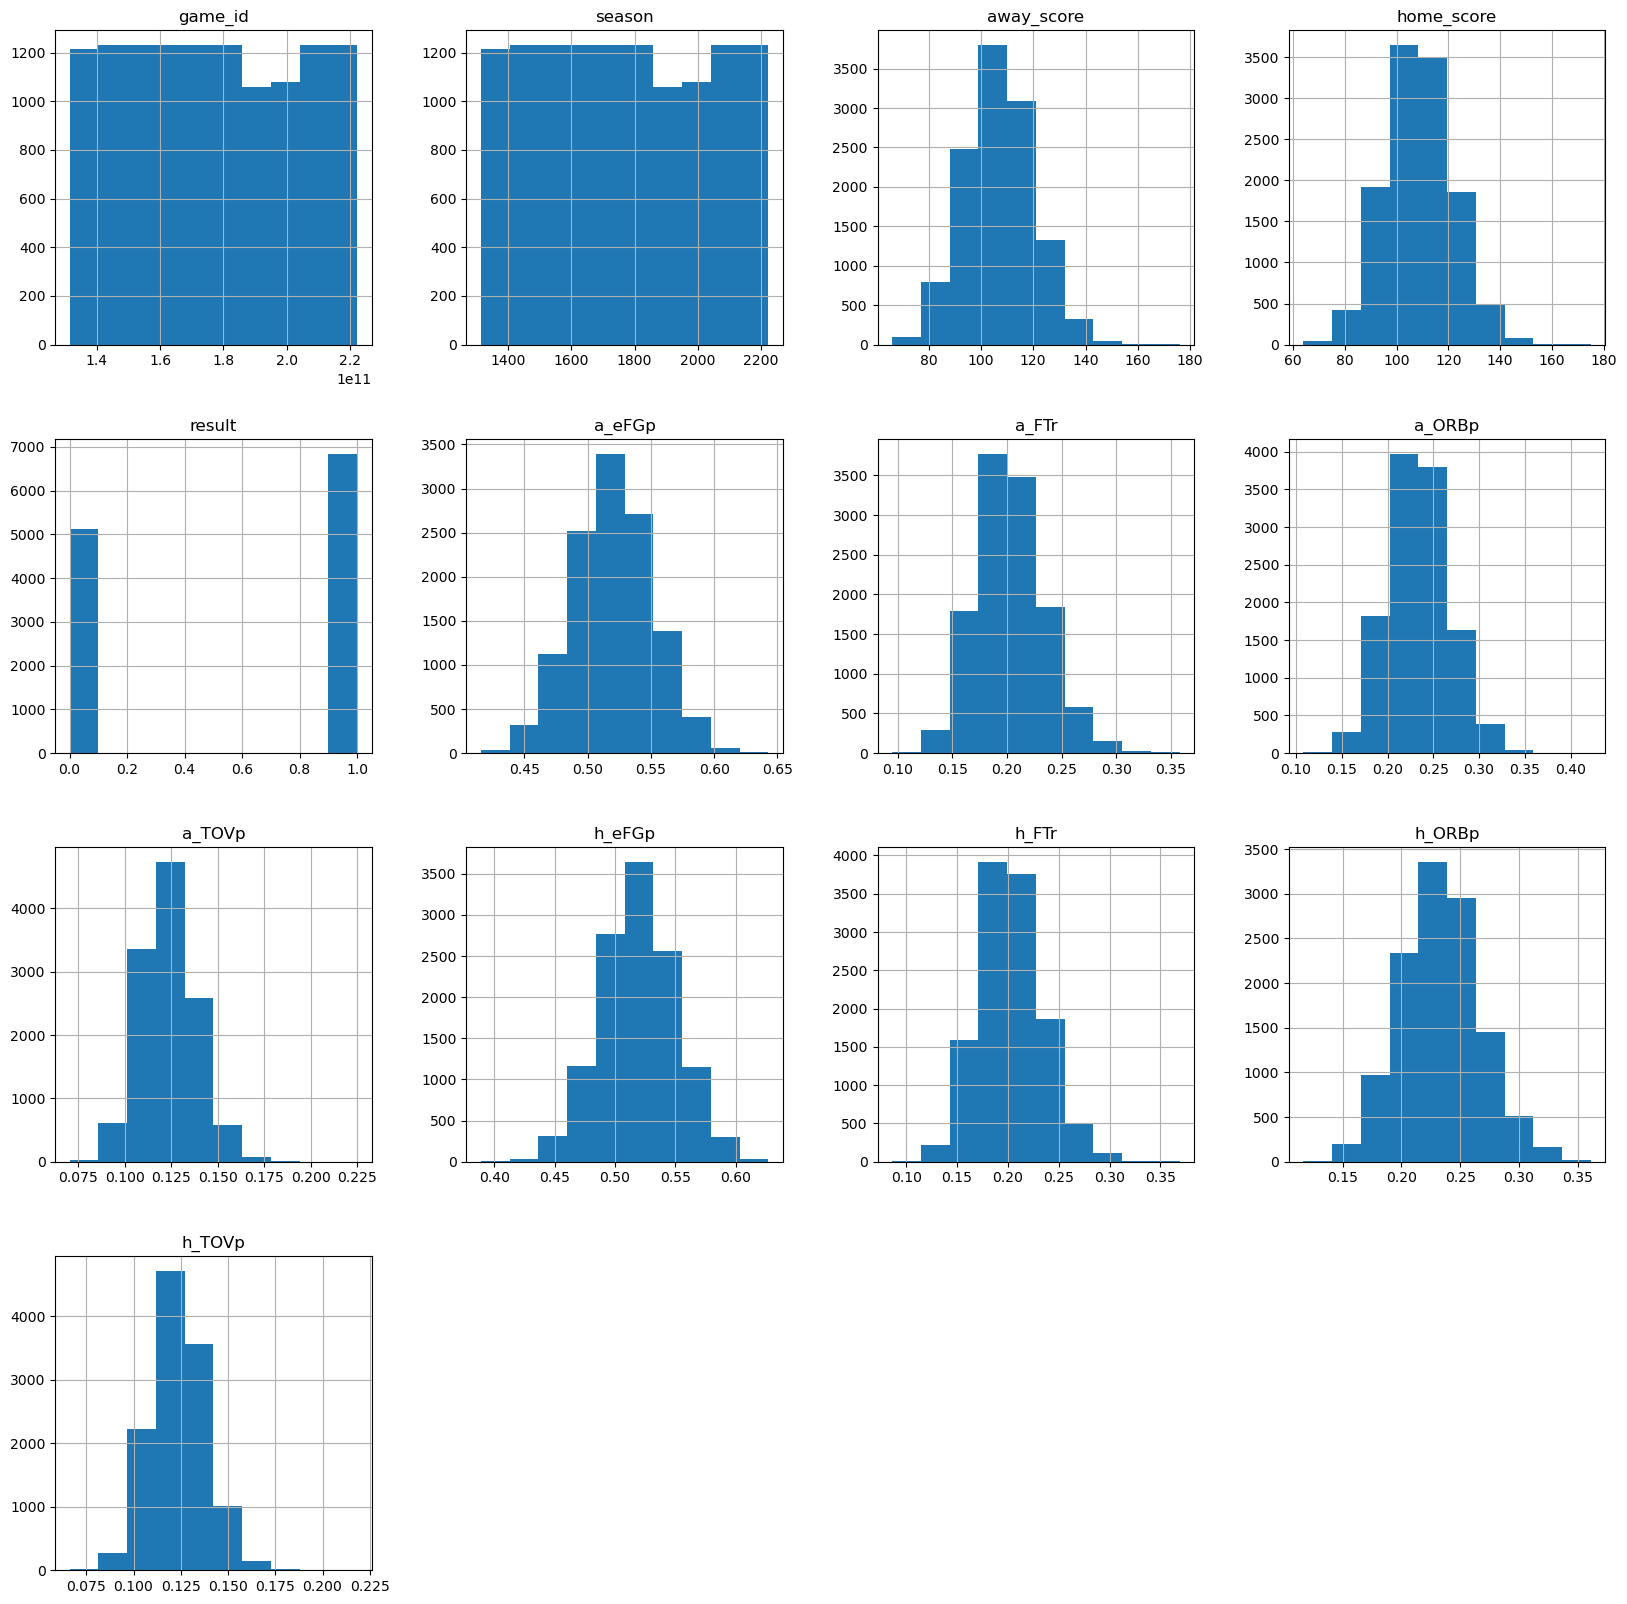

In [6]:
team_factor_10.dropna(inplace=True)
team_factor_10.reset_index(drop=True, inplace=True)
team_factor_10.hist(figsize=(20,20));

A couple things to note here:

* the data all appears to be normally distributed.
* `game_id` and `season` indicate that the 2019-2020 and 2020-2021 season were shortened due to COVID, resulting in less total games.

## Modeling

I used a number of different modeling techniques to evaluate the relative effectiveness of each, with a plan to create an ensemble model that uses the best individual models. The modeling techniques I use include:

* Logistic Regression
* K-Nearest Neighbors (KNN)
* Random Forest (RF)
* Gaussian Naive-Bayes (GNB)
* Support Vector Classifier (SVC)
* Neural Network (NN)
* Elo System

These models provide a mix of weak- and strong-learning binary classifiers, and allow me to evaluate and consider which models would be suitable for an ensemble model. I go into more detail about each model in the sections below.

### Baseline Model

The "baseline" model always selects the home team as the winner. There is a notable home-court advantage in the NBA, with the home team typically winning around 60% of their games in a given season. For my dataset, the exact value is 57.2%:

In [7]:
game_info['result'].value_counts(normalize=True)

1    0.572502
0    0.427498
Name: result, dtype: float64

### Model Target

Traditionally, the NBA has an upset rate of between 28-32%, meaning that the "better" team wins 68-72% of the time. Because of this, it is very challenging to create a model with an accuracy higher than 68-72%. Given the limitations of the data I am using, I hope to achieve an accuracy that approaches the 68% threshold.


Next, I need to create a class that will allow me to easily train and evaluate each model:

In [8]:
# create results and residuals df to hold modeling results
results_df = pd.DataFrame(columns=['model_name', 'cv_score', 'gs_score', 'train_score', 'test_score'])
residuals_df = pd.DataFrame(columns=['y_true'])
residuals_df['y_true'] = team_factor_10['result']

In [9]:
class ModelEval():
    '''
    A pipeline to process data, perform cross validation and grid search,
    fit model, calculate model predictions and accuracy, create confidence matrix,
    and log results.
    
    Parameters
    ----------
    model : an instantiated scikit-learn model object.
    
    model_name : a string with the model name
    
    results_df : dataframe to hold the results for each successive model
    
    residuals_df : dataframe to hold the predictions for each successive model
    
    stats : X_train, X_test, y_train, y_test from sklearn.model_selection.train_test_split
    
    param_grid : the parameter grid used in the model grid search
    
    scaler : a 'yes'/'no' string indicating whether the model requires
             scaling the data with sklearn.preprocessing.StandardScaler
    
    pca : a 'yes'/'no' string indicating whether or not to perform scaling and PCA on the data.
    '''
    
    def __init__(self, model, model_name, results_df, residuals_df, stats, param_grid, scaler='no', pca='no'):
        
        self.model = model
        self.model_name = model_name
        self.results_df = results_df
        self.residuals_df = residuals_df
        self.X_train, self.X_test, self.y_train, self.y_test = stats
        self.param_grid = param_grid
        self.cv_score = None
        self.gs_score = None
        
        if scaler == 'yes':
            scaler = StandardScaler()
            self.X_train = scaler.fit_transform(self.X_train)
            self.X_test = scaler.transform(self.X_test)
            
        if pca == 'yes':
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(self.X_train)
            X_test_scaled = scaler.transform(self.X_test)

            pca = PCA(n_components=10)
            X_train_pca = pca.fit_transform(X_train_scaled)
            X_test_pca = pca.transform(X_test_scaled)
            
            self.X_train = X_train_pca
            self.X_test = X_test_pca

            self.explained_variance = sum(pca.explained_variance_ratio_)
    
    def calc_cv(self):
        
        cv_scores = cross_val_score(self.model, self.X_train, self.y_train, cv=3)
        self.cv_score = cv_scores.mean()
        self.fitted_model = self.model.fit(self.X_train, self.y_train)
    
    def calc_grid_search(self):
        
        grid_search = GridSearchCV(self.model, self.param_grid, cv=3)
        self.fitted_model = grid_search.fit(self.X_train, self.y_train)
        self.params_model = grid_search.best_estimator_
        self.gs_score = grid_search.best_score_
        
    def calc_train_preds(self):
        
        self.train_preds = self.fitted_model.predict(self.X_train)
    
    def calc_test_preds(self):
        
        self.test_preds = self.fitted_model.predict(self.X_test)
    
    def calc_train_score(self):
        
        self.train_score = self.fitted_model.score(self.X_train, self.y_train)
    
    def calc_test_score(self):
    
        self.test_score = self.fitted_model.score(self.X_test, self.y_test)
    
    def create_conf_matrix(self):
        conf_matrix = confusion_matrix(y_true=self.y_test, y_pred=self.test_preds)
        self.disp = ConfusionMatrixDisplay(conf_matrix)
        return self.disp.plot();
    
    def record_results(self):
        
        idx = self.results_df.shape[0]
        results_df.loc[idx] = [self.model_name, self.cv_score, self.gs_score, self.train_score, self.test_score]
    
    def calc_residuals(self):
        
        train_preds_df = pd.DataFrame(self.train_preds, index=self.y_train.index)
        test_preds_df = pd.DataFrame(self.test_preds, index=self.y_test.index)
        
        self.model_preds = pd.concat([train_preds_df, test_preds_df]).sort_index()
        
        self.residuals_df[f'{self.model_name}' + '_residuals'] = self.residuals_df['y_true'] - self.model_preds[0]
    
    def full_diag(self):
        
        if self.param_grid == None:   
            self.calc_cv()
        else:
            self.calc_grid_search()
            
        self.calc_train_preds()
        self.calc_test_preds()
        self.calc_train_score()
        self.calc_test_score()
        self.create_conf_matrix()
        self.record_results()
        self.calc_residuals()

This class will perform all the necessary model training and evaluations, and record the results for easy comparison later.

### Team Four Factor: 10-game Aggregation

The first round of modeling will be performed using the 10-game team four factor dataset, which means I am using each teams average four factor stats from their past 10 games. See the [Data Aggregation](#Data-Aggregation) section for a more detailed explanation.

#### Logistic Regression Model (8 variables)

Logistic regression models are designed to predict binary classification tasks by determining the probability of each outcome. They are relatively fast and efficient, especially for smaller datasets.

First I will try modeling with the away and home team stats separated, meaning there are eight total features. I will then repeat the modeling process, but I will combine the stats into four total features. My assumption is that reducing the feature count will retain the information while reducing dimensionality, which should result in a slightly better model. Since I want to focus on the variable count, I won't perform any hyperparameter tuning yet and instead use the defaults.

In [10]:
stat_columns = ['a_eFGp', 'a_FTr', 'a_ORBp', 'a_TOVp', 'h_eFGp', 'h_FTr', 'h_ORBp', 'h_TOVp']

X = team_factor_10[stat_columns]
y = team_factor_10['result']

stats = train_test_split(X, y, train_size=.80, random_state=seed)

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var_10,0.60023,None,0.607441,0.598412


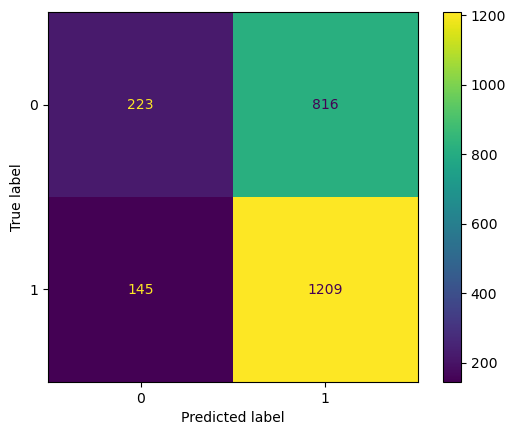

In [11]:
# instantiate model object
log = LogisticRegression(random_state=seed)

# train and evaluate the model
log_model = ModelEval(log, 'log_4F_8var_10', results_df, residuals_df, stats, None)
log_model.full_diag()

results_df

The model has an accuracy (`test_score`) of 59.8%. This is very close to the `cv_score` of 60%, so the model is likely not overfit. The confusion matrix shows that the model tends to predict home team victories at a very high rate (Predicted label 1). This leads to a lot of false positives, and is somethign that will need to be considered as we compare future models.

#### Logistic Regression (4 variables)

This time I will combine the away and home stats. In the case of `eFGp`, `FTr`, and `ORBp`, a positive total indicates that the away team has outperformed the home team in recent games, and opposite if the total is negative. But since teams want a low `TOVp`, a positive total indicates that the home team is outperforming the away team.

In [12]:
# combine away and home stats
team_factor_10['eFGp'] = team_factor_10['a_eFGp'] - team_factor_10['h_eFGp']
team_factor_10['FTr'] = team_factor_10['a_FTr'] - team_factor_10['h_FTr']
team_factor_10['ORBp'] = team_factor_10['a_ORBp'] - team_factor_10['h_ORBp']
team_factor_10['TOVp'] = team_factor_10['a_TOVp'] - team_factor_10['h_TOVp']

stat_columns = ['eFGp', 'FTr', 'ORBp', 'TOVp']

X = team_factor_10[stat_columns]
y = team_factor_10['result']

stats = train_test_split(X, y, train_size=.80, random_state=seed)

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var_10,0.600230,None,0.607441,0.598412
1,log_4F_10,0.610995,None,0.615907,0.607188


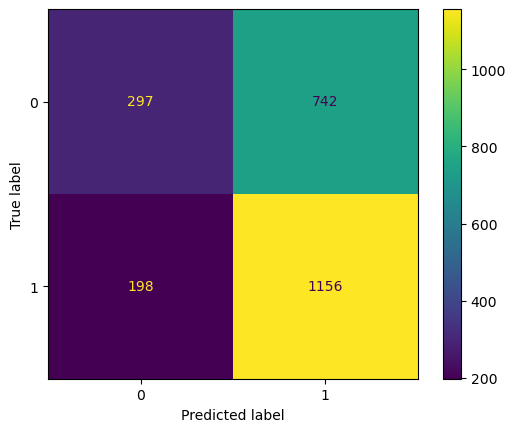

In [13]:
logreg = LogisticRegression(random_state=seed)
logreg_model = ModelEval(logreg, 'log_4F_10', results_df, residuals_df, stats, None)
logreg_model.full_diag()

results_df

It seems that combining the stats did lead to a slight increase in accuracy of about 1%. It is possible that this won't be the case for other models, but for now I will use the 4-variable model until I have narrowed the model selection process.

#### Logistic Regression Grid Search

This time I will perform a grid search with the logistic regression model. Included in the grid search are different penalties, which means that the model will be performing regularization. Because of this, I also need to scale the data. I have chosen `solver='saga'` because it is the only one that can be used with each `penalty` method. `C` determines the strength of the regularization penalty. A smaller `C` means the model will perform stronger regularization.

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var_10,0.600230,NaN,0.607441,0.598412
1,log_4F_10,0.610995,NaN,0.615907,0.607188
2,log_gs_4F_10,NaN,0.617893,0.618834,0.619306


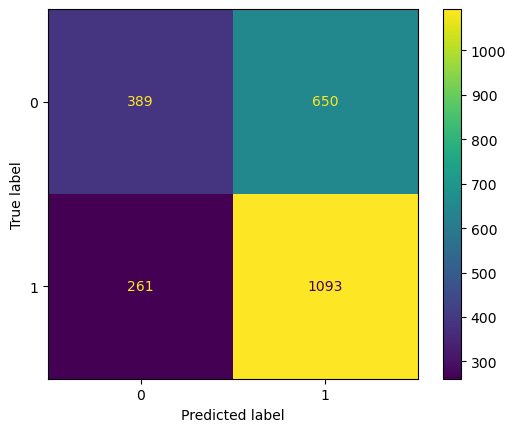

In [14]:
log_gs = LogisticRegression(solver='saga', random_state=seed)
log_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1.0,],
}

log_gs_model = ModelEval(log_gs, 'log_gs_4F_10', results_df, residuals_df, stats, log_param_grid, scaler='yes')
log_gs_model.full_diag()

results_df

In [15]:
log_gs_model.params_model

LogisticRegression(C=0.1, random_state=99, solver='saga')

The grid search has improved accuracy, but the confusion matrices show that there are still a lot of false positives (650). A home-team win is represented as a 1, so this means the model tends to favor the home team. As noted earlier, since there is a definite home-court advantage, it is understandable that the model would err toward always choosing the home team. Now let's see how the other models perform.

#### K-Nearest Neighbors (KNN)

This model is a non-parametric, supervised learning classifier which will make a prediction based on the "nearest neighbor" datapoints. The assumption is that the other most-similar datapoints will likely have the same outcome as the datapoint in question. After some trial and error, I determined that the best performing models had a relatively high number of `n_neighbors`, which is reflected in the parameter grid.

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var_10,0.600230,NaN,0.607441,0.598412
1,log_4F_10,0.610995,NaN,0.615907,0.607188
2,log_gs_4F_10,NaN,0.617893,0.618834,0.619306
3,knn_4F_10,NaN,0.587897,0.645694,0.600919


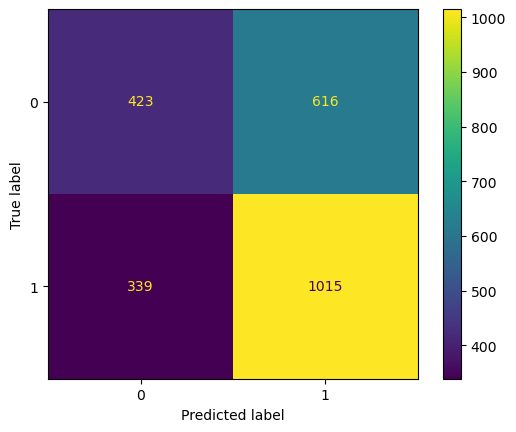

In [16]:
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [15, 17, 19],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

knn_model = ModelEval(knn, 'knn_4F_10', results_df, residuals_df, stats, knn_param_grid, scaler='yes')
knn_model.full_diag()

results_df

In [17]:
knn_model.params_model

KNeighborsClassifier(n_neighbors=19, p=3)

The KNN model is performing similarly to the logistic regression model. The train score is inflated since the model was fit on portions of the training data, but the increase in accuracy between the grid score and the test score indicate the model is likely not overfit.

#### Random Forest (RF)

The RF model is technically an ensemble method since it uses multiple decision trees to arrive at its predictions. Again, I have narrowed down the best possible grid parameters based on some trial and error.

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var_10,0.600230,NaN,0.607441,0.598412
1,log_4F_10,0.610995,NaN,0.615907,0.607188
2,log_gs_4F_10,NaN,0.617893,0.618834,0.619306
3,knn_4F_10,NaN,0.587897,0.645694,0.600919
4,rfc_4F_10,NaN,0.620297,0.636601,0.610531


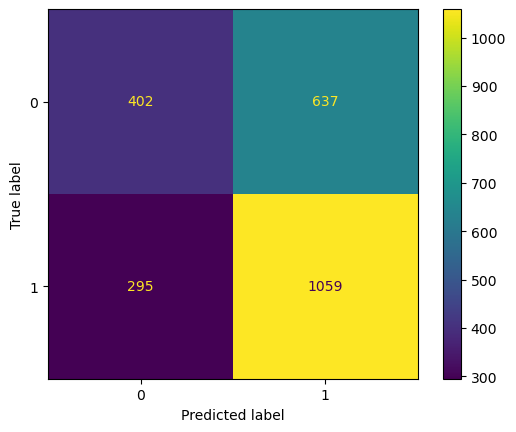

In [18]:
rfc = RandomForestClassifier(random_state=seed)
rfc_param_grid = {
    'criterion': ['gini'],
    'n_estimators': [130, 140, 150],
    'max_depth': [4, 5, 6],
    'min_samples_split': [2],
    'max_features': ['sqrt', None]
}

rfc_model = ModelEval(rfc, 'rfc_4F_10', results_df, residuals_df, stats, rfc_param_grid)
rfc_model.full_diag()

results_df

In [19]:
rfc_model.params_model

RandomForestClassifier(max_depth=5, max_features=None, n_estimators=140,
                       random_state=99)

The RF model is performing well, but is significantly more computationally expensive than the other models so far, meaning that it may not be the best choice.

#### Gaussian Naive Bayes (GNB)

The Gaussian Naive Bayes model assumes a gaussian, or normal, distribution of the data. Since the data is very normal, this model is an excellent candidate for the task at hand. It is also relatively quick and efficient, as compared to something like the RF model. It dos not have hyperparameters, so there is no need for a grid search.

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var_10,0.600230,NaN,0.607441,0.598412
1,log_4F_10,0.610995,NaN,0.615907,0.607188
2,log_gs_4F_10,NaN,0.617893,0.618834,0.619306
3,knn_4F_10,NaN,0.587897,0.645694,0.600919
4,rfc_4F_10,NaN,0.620297,0.636601,0.610531
5,gnb_4F_10,0.613921,None,0.617057,0.610949


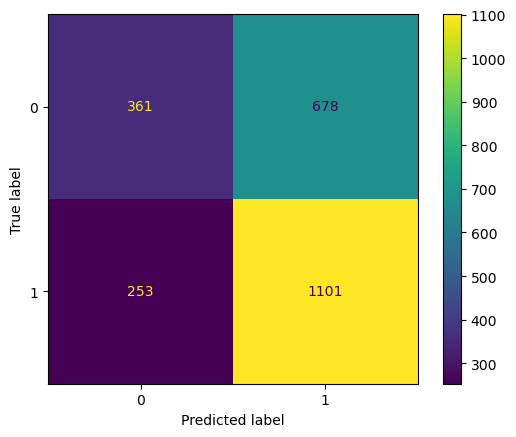

In [20]:
gnb = GaussianNB()
gnb_model = ModelEval(gnb, 'gnb_4F_10', results_df, residuals_df, stats, None)
gnb_model.full_diag()

results_df

#### Support Vector Classifier (SVC)

SVCs make predictions by mapping the datapoints onto a multidimensional space and finding the optimal hyperplane for splitting the data into two classes, which in this case is away-team win and home-team win. Like the logistic regression model, it also has a regularization strength hyperparameter (`C`).

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var_10,0.600230,NaN,0.607441,0.598412
1,log_4F_10,0.610995,NaN,0.615907,0.607188
2,log_gs_4F_10,NaN,0.617893,0.618834,0.619306
3,knn_4F_10,NaN,0.587897,0.645694,0.600919
4,rfc_4F_10,NaN,0.620297,0.636601,0.610531
5,gnb_4F_10,0.613921,None,0.617057,0.610949
6,svc_4F_10,NaN,0.618207,0.626359,0.608023


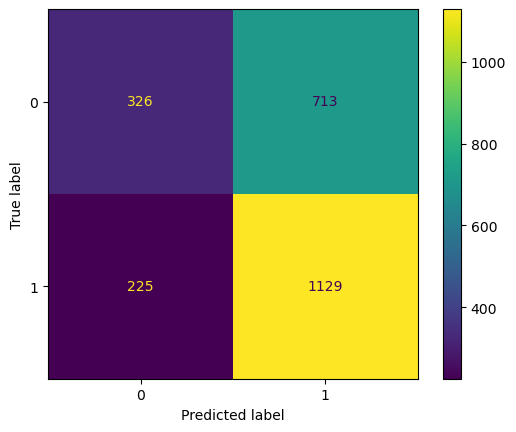

In [21]:
svc = SVC(random_state=seed)

svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svc_model = ModelEval(svc, 'svc_4F_10', results_df, residuals_df, stats, svc_param_grid, scaler='yes')
svc_model.full_diag()

results_df

In [22]:
svc_model.params_model

SVC(C=1, gamma='auto', random_state=99)

After one full round of modeling, the models are all performing similarly, with an average accuracy near 60%. This is an improvement over the baseline model accuracy of 57.2%, but still falls short of the 68% goal. The confusion matrices also reveal similar biases, with a high percent of false positives. This could be coincidental, but it likely indicates that there is not enough data to adequately differentiate between the two classes. In order to test this, I will use the other data aggregations to see if there are any changes in performance. But first I will examine the model error in more detail to see what else can be learned.

### Error Modeling

I will plot the error on a per-season and per-model basis to see if there are any specific areas where the models are struggling. Since I used team aggregation data, I know that the models are unable to quickly account for roster changes, which are mainly due to a few factors:

* injuries
* trades
* free-agency
* draft

My hypothesis is that the models will have less error in the second half of each season because of fewer roster changes. Once the trade deadline has passed, rosters mostly remain the same outside of injuries and the occasional signing. At the start of a season, however, there will be a lot of uncertainty since the off-season is when we see the vast majority of roster changes. And since my team-aggregated data does not reset between seasons, the models are using data that has been carried over from the end of the previous season even though the rosters may be completely different.

In [23]:
residuals_df

,y_true,log_4F_8var_10_residuals,log_4F_10_residuals,log_gs_4F_10_residuals,knn_4F_10_residuals,rfc_4F_10_residuals,gnb_4F_10_residuals,svc_4F_10_residuals
0,1,1,0,0,0,1,0,0
1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1
3,1,0,0,0,0,0,0,0
4,0,0,0,0,-1,0,0,0
...,...,...,...,...,...,...,...,...
11956,1,0,0,0,0,0,0,0
11957,1,0,0,0,1,0,0,0
11958,1,1,1,1,0,1,1,1
11959,0,0,0,0,-1,0,0,-1


The table above shows the outcome, `y_true`, and the predictions of each model. If I subtract the model predictions from the true outcomes to obtain the residuals, a correct prediction will equal zero (boolean `False`), and a false prediction will be a non-zero (boolean `True`). I can then count the incorrect predictions and plot them by season and by model since the datapoints have a chronological component:

In [24]:
# create df with model errors and the season
error_df = residuals_df.drop(['y_true', 'log_4F_8var_10_residuals', 'log_4F_10_residuals'], axis=1)
error_df['season'] = team_factor_10['season']

# dictionary to store error counts for each model
error_dict = {}


for model in error_df.columns[:-1]:    # ignore the 'season' column
    
    # dictionary to store error counts for each season
    model_error = {}    
    for season in error_df['season'].unique():
        # pull predictions for specific model and season
        season_stats = error_df[model][error_df['season'] == season].to_frame()
        # split season into 4 quarters
        season_stats['bin'] = pd.cut(season_stats.index, bins=4, labels=[0,1,2,3])
        
        season_error_list = []
        for b in season_stats['bin'].unique():
            # store error counts for each quarter
            error_count = season_stats[model][season_stats['bin'] == b].astype(bool).sum(axis=0)
            season_error_list.append(error_count)
    
        model_error[season] = season_error_list
        
    error_dict[model] = model_error

# get average quarterly error across all seasons
for model in error_dict:
    
    q_avg = []
    for n in list(range(4)):

        avg_error = round(np.mean([season[n] for season in error_dict[model].values()]), 1)
        q_avg.append(avg_error)
    
    error_dict[model]['quarterly_error_avg'] = q_avg

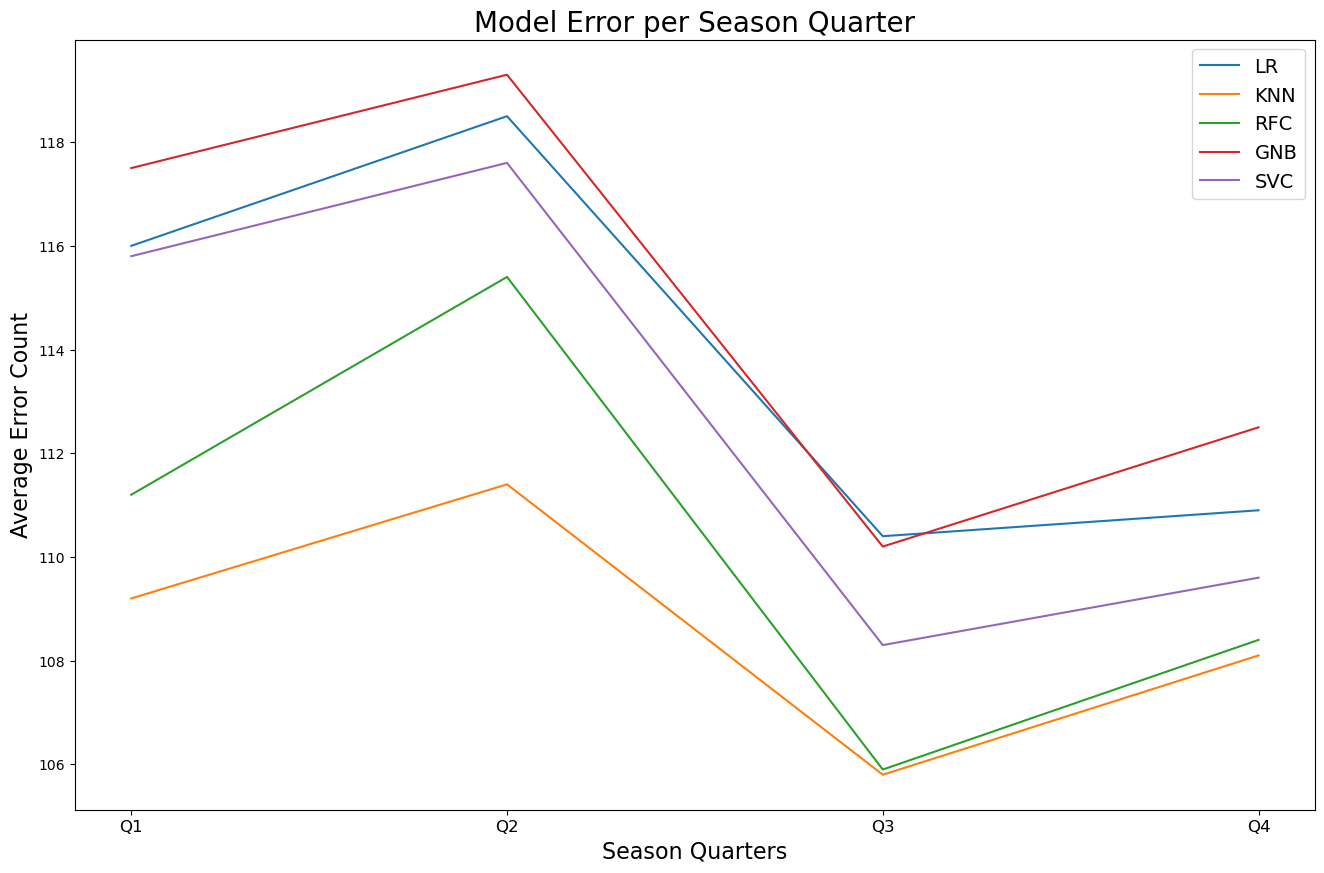

In [25]:
# model lables for the legend
labels = ['LR', 'KNN', 'RFC', 'GNB', 'SVC']

fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title('Model Error per Season Quarter', fontsize=20)
ax.set_xlabel('Season Quarters', fontsize=16)
ax.set_ylabel('Average Error Count', fontsize=16)
ax.set_xticks(range(5))
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4', ''], fontsize=12)

# plot average error per season quarter
key_list = list(error_dict.keys())
for idx in range(len(error_dict.keys())):
    plt.plot(error_dict[key_list[idx]]['quarterly_error_avg'], label=labels[idx])

plt.legend(fontsize=14);

It is clear that the models are behaving very similarly, not just in terms of overall accuracy, but also the error distribution over the course of a season. My hypothesis that the second half of each season would be less error-prone seems possible, but the cross-model similarity also suggests there is not enough information in the data to differentiate the models.

Next I will examine the average model error per season to see if there are any outliers:

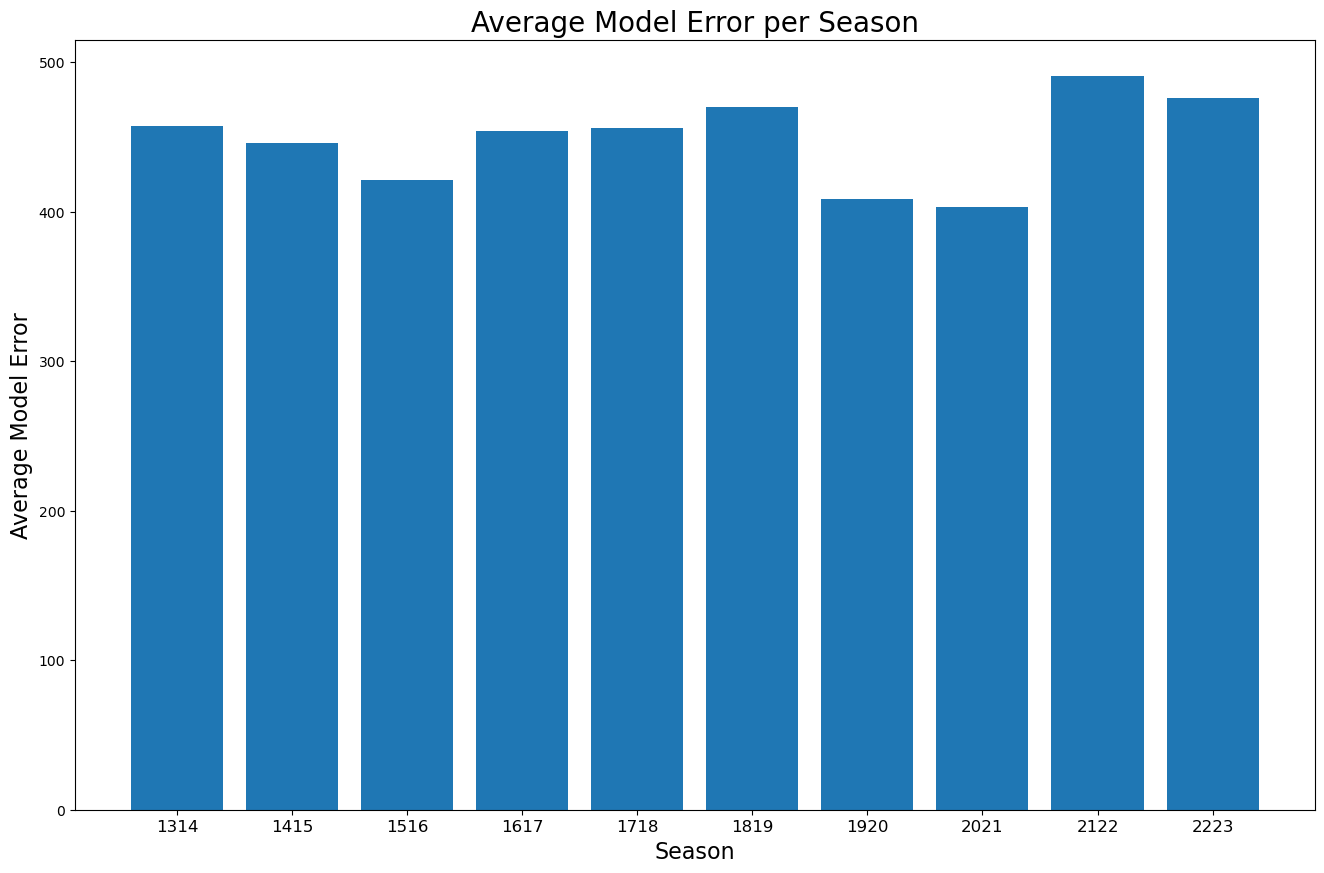

In [26]:
# dictionary to store per season error counts
season_avg_error = {}
for season in error_df['season'].unique():
    
    season_avg_error[season] = []
    for model in error_df.columns[:-1]:
        # sum of errors per season
        season_avg_error[season].append(sum(error_dict[model][season]))

for season in season_avg_error:
    # combine error sums from each model
    season_avg_error[season] = sum(season_avg_error[season])/len(error_df.columns[:-1])


fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title('Average Model Error per Season', fontsize=20)
ax.set_xlabel('Season', fontsize=16)
ax.set_ylabel('Average Model Error', fontsize=16)
ax.set_xticks(range(10))
ax.set_xticklabels([season for season in error_df['season'].unique()], fontsize=12)

# plot avergae error count per season
plt.bar(x=range(len(season_avg_error.keys())), height=season_avg_error.values());

The barplot shows a relatively consistent performance across each season. There is a dip in the 2019-2020 and 2020-2021 seasons, but those seasons were also shortened due to COVID. Plotting the error-per-game reveals that these 2 seasons were similar as well:

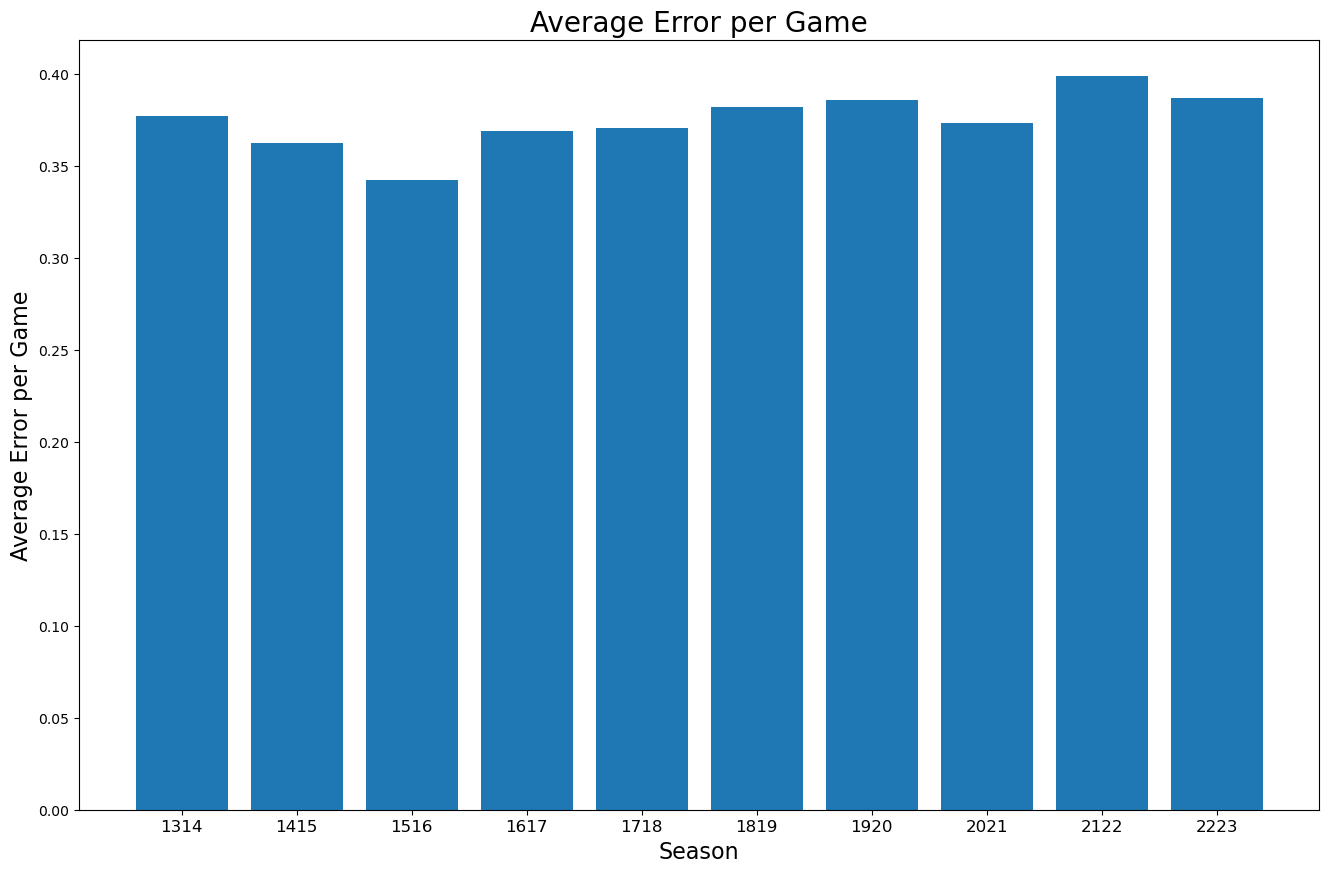

In [27]:
error_per_game = []
for season in season_avg_error:
    # divide overall average error by the number of games each season
    per_game_error = season_avg_error[season]/len(error_df[error_df['season'] == season])
    error_per_game.append(per_game_error)

fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title('Average Error per Game', fontsize=20)
ax.set_xlabel('Season', fontsize=16)
ax.set_ylabel('Average Error per Game', fontsize=16)
ax.set_xticks(range(10))
ax.set_xticklabels([season for season in error_df['season'].unique()], fontsize=12)

# plot error per game by season
plt.bar(x=range(len(season_avg_error.keys())), height=error_per_game);

Each season has close to 0.35-0.40 errors per game, meaning that for every 10 games in a given season, the models average about three-and-a-half to four errors. This matches the average model accuracy of around 60% calculated earlier.

Now that I have a good sense of what the models are able to reveal about the data, I will attempt to model my other datasets to determine if they are more effective.

### Team Four Factor: 20-game Aggregation

I will repeat the modeling process from before using the same 5 model types, but this time I will use the average four factor stats from the past 20 games instead of only 10. This will prioritize consistency, and make the data less susceptible to outlier performances.

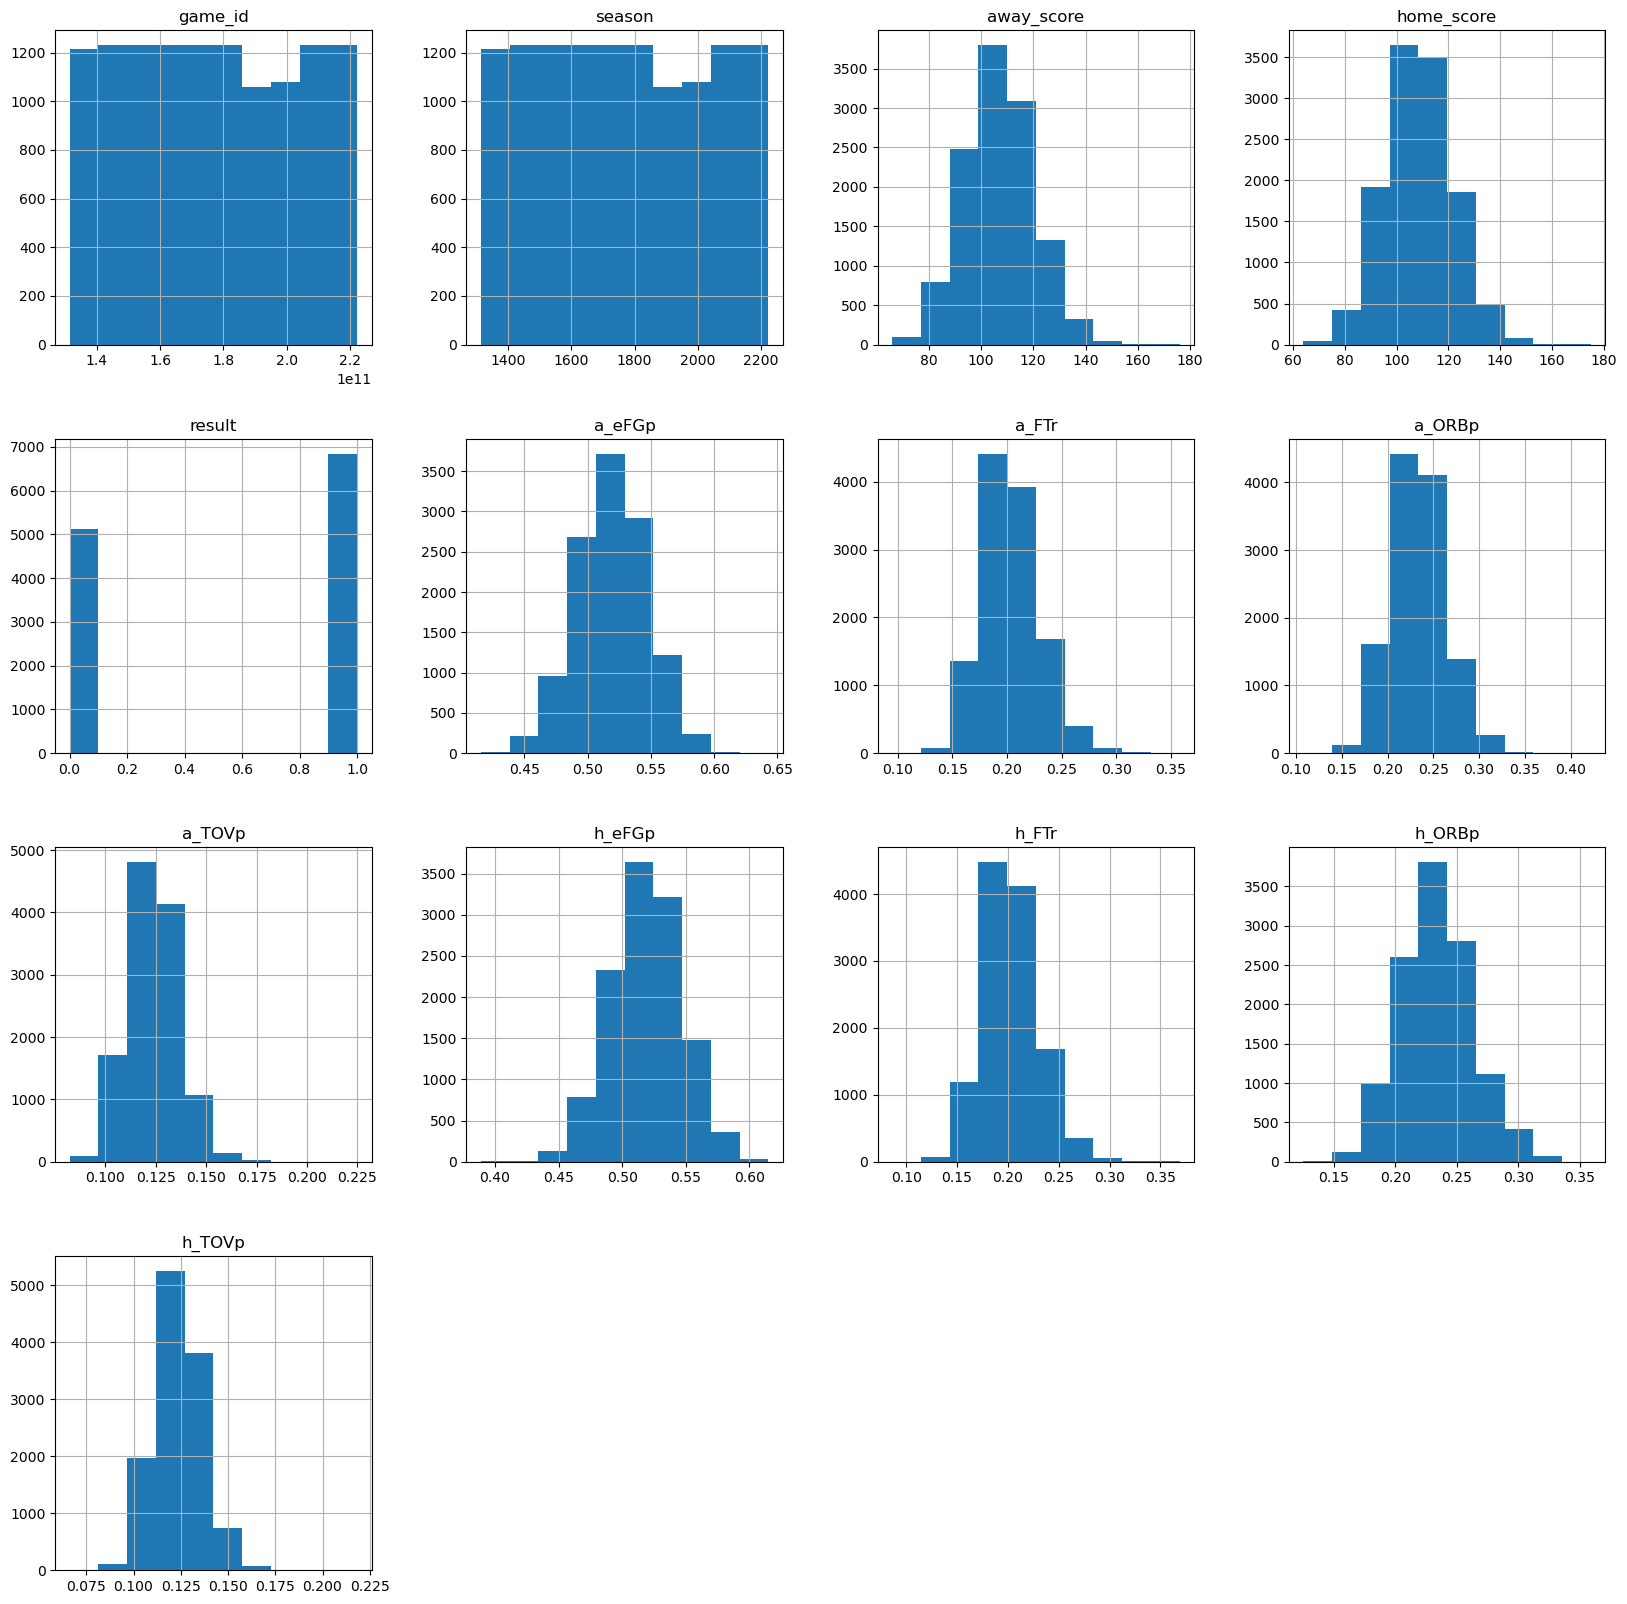

In [28]:
team_factor_20.dropna(inplace=True)
team_factor_20.reset_index(drop=True, inplace=True)
team_factor_20.hist(figsize=(20,20));

In [29]:
team_factor_20['eFGp'] = team_factor_20['a_eFGp'] - team_factor_20['h_eFGp']
team_factor_20['FTr'] = team_factor_20['a_FTr'] - team_factor_20['h_FTr']
team_factor_20['ORBp'] = team_factor_20['a_ORBp'] - team_factor_20['h_ORBp']
team_factor_20['TOVp'] = team_factor_20['a_TOVp'] - team_factor_20['h_TOVp']

# results_df = pd.DataFrame(columns=['model_name', 'cv_score', 'gs_score', 'train_score', 'test_score'])
residuals_df_20 = pd.DataFrame(columns=['y_true'])
residuals_df_20['y_true'] = game_info['result']

In [30]:
stat_columns = ['eFGp', 'FTr', 'ORBp', 'TOVp', 'season']

X = team_factor_20[stat_columns]
y = team_factor_20['result']

stats = train_test_split(X, y, train_size=.80, random_state=seed)

#### Logistic Regression

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var_10,0.600230,NaN,0.607441,0.598412
1,log_4F_10,0.610995,NaN,0.615907,0.607188
2,log_gs_4F_10,NaN,0.617893,0.618834,0.619306
3,knn_4F_10,NaN,0.587897,0.645694,0.600919
4,rfc_4F_10,NaN,0.620297,0.636601,0.610531
5,gnb_4F_10,0.613921,None,0.617057,0.610949
6,svc_4F_10,NaN,0.618207,0.626359,0.608023
7,log_gs_4F_20,NaN,0.629911,0.629494,0.620560


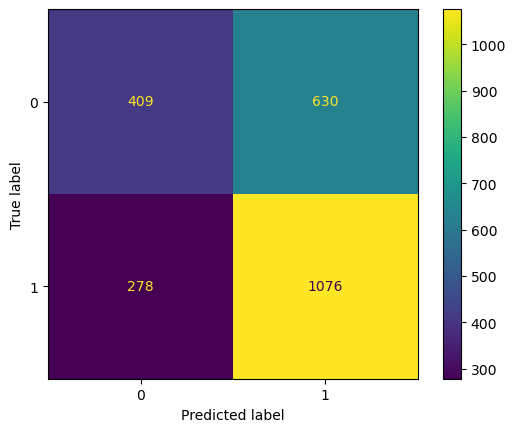

In [31]:
log_gs = LogisticRegression(solver='saga', random_state=seed)
log_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1.0,],
}

log_gs_model = ModelEval(log_gs, 'log_gs_4F_20', results_df, residuals_df_20, stats, log_param_grid, scaler='yes')
log_gs_model.full_diag()

results_df

In [32]:
log_gs_model.params_model

LogisticRegression(C=0.01, penalty=None, random_state=99, solver='saga')

#### KNN

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var_10,0.600230,NaN,0.607441,0.598412
1,log_4F_10,0.610995,NaN,0.615907,0.607188
2,log_gs_4F_10,NaN,0.617893,0.618834,0.619306
3,knn_4F_10,NaN,0.587897,0.645694,0.600919
4,rfc_4F_10,NaN,0.620297,0.636601,0.610531
5,gnb_4F_10,0.613921,None,0.617057,0.610949
6,svc_4F_10,NaN,0.618207,0.626359,0.608023
7,log_gs_4F_20,NaN,0.629911,0.629494,0.620560
8,knn_4F_20,NaN,0.603992,0.651442,0.593397


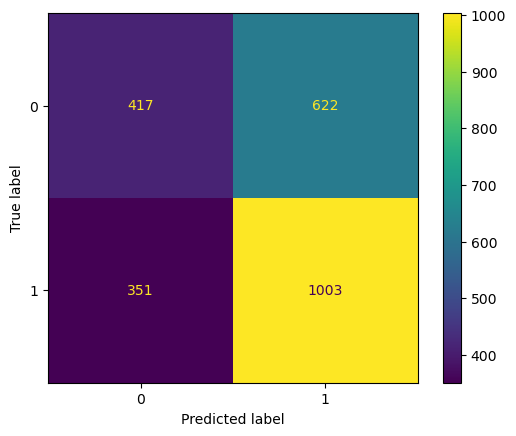

In [33]:
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [17, 19, 21],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

knn_model = ModelEval(knn, 'knn_4F_20', results_df, residuals_df_20, stats, knn_param_grid, scaler='yes')
knn_model.full_diag()

results_df

In [34]:
knn_model.params_model

KNeighborsClassifier(n_neighbors=21, p=3)

#### RF

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var_10,0.600230,NaN,0.607441,0.598412
1,log_4F_10,0.610995,NaN,0.615907,0.607188
2,log_gs_4F_10,NaN,0.617893,0.618834,0.619306
3,knn_4F_10,NaN,0.587897,0.645694,0.600919
4,rfc_4F_10,NaN,0.620297,0.636601,0.610531
5,gnb_4F_10,0.613921,None,0.617057,0.610949
6,svc_4F_10,NaN,0.618207,0.626359,0.608023
7,log_gs_4F_20,NaN,0.629911,0.629494,0.620560
8,knn_4F_20,NaN,0.603992,0.651442,0.593397
9,rfc_4F_20,NaN,0.630538,0.657086,0.617217


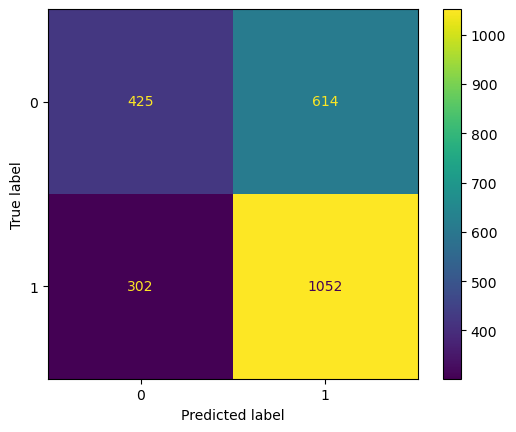

In [35]:
rfc = RandomForestClassifier(random_state=seed)
rfc_param_grid = {
    'criterion': ['gini'],
    'n_estimators': [225, 250, 275],
    'max_depth': [4, 5, 6],
    'min_samples_split': [2],
    'min_samples_leaf': [4],
    'max_features': ['sqrt', None]
}

rfc_model = ModelEval(rfc, 'rfc_4F_20', results_df, residuals_df_20, stats, rfc_param_grid)
rfc_model.full_diag()

results_df

In [36]:
rfc_model.params_model

RandomForestClassifier(max_depth=6, min_samples_leaf=4, n_estimators=250,
                       random_state=99)

#### GNB

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var_10,0.600230,NaN,0.607441,0.598412
1,log_4F_10,0.610995,NaN,0.615907,0.607188
2,log_gs_4F_10,NaN,0.617893,0.618834,0.619306
3,knn_4F_10,NaN,0.587897,0.645694,0.600919
4,rfc_4F_10,NaN,0.620297,0.636601,0.610531
5,gnb_4F_10,0.613921,None,0.617057,0.610949
6,svc_4F_10,NaN,0.618207,0.626359,0.608023
7,log_gs_4F_20,NaN,0.629911,0.629494,0.620560
8,knn_4F_20,NaN,0.603992,0.651442,0.593397
9,rfc_4F_20,NaN,0.630538,0.657086,0.617217


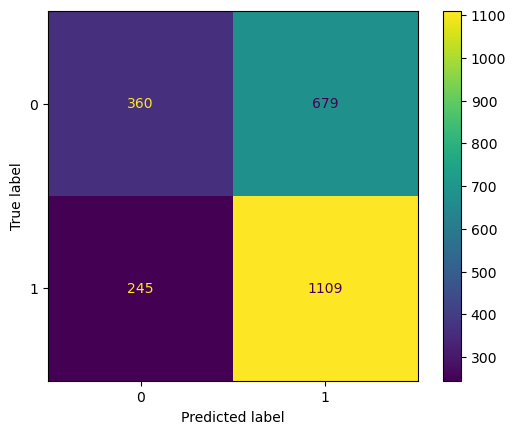

In [37]:
gnb = GaussianNB()
gnb_model = ModelEval(gnb, 'gnb_4F_20', results_df, residuals_df_20, stats, None)
gnb_model.full_diag()

results_df

#### SVC

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var_10,0.600230,NaN,0.607441,0.598412
1,log_4F_10,0.610995,NaN,0.615907,0.607188
2,log_gs_4F_10,NaN,0.617893,0.618834,0.619306
3,knn_4F_10,NaN,0.587897,0.645694,0.600919
4,rfc_4F_10,NaN,0.620297,0.636601,0.610531
5,gnb_4F_10,0.613921,None,0.617057,0.610949
6,svc_4F_10,NaN,0.618207,0.626359,0.608023
7,log_gs_4F_20,NaN,0.629911,0.629494,0.620560
8,knn_4F_20,NaN,0.603992,0.651442,0.593397
9,rfc_4F_20,NaN,0.630538,0.657086,0.617217


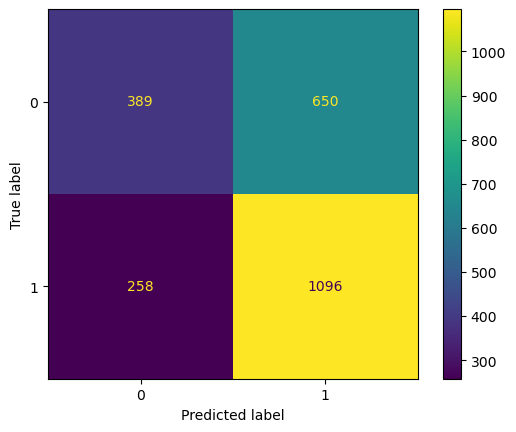

In [38]:
svc = SVC(random_state=seed)

svc_param_grid = {
    'C': [1, 10, 50],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svc_model = ModelEval(svc, 'svc_4F_20', results_df, residuals_df_20, stats, svc_param_grid, scaler='yes')
svc_model.full_diag()

results_df

In [39]:
svc_model.params_model

SVC(C=10, kernel='linear', random_state=99)

The 20-game dataset shows minor improvements of around 1-2% over the 10-game dataset. This still falls short of the goal, but confirms prior research that suggested that the ideal number of past games is between 20 and 30. Next I will repeat the modeling process with the 30-game dataset. I anticipate that the results will be similar to the 20-game dataset.

### Team Four Factor: 30-game Aggregation

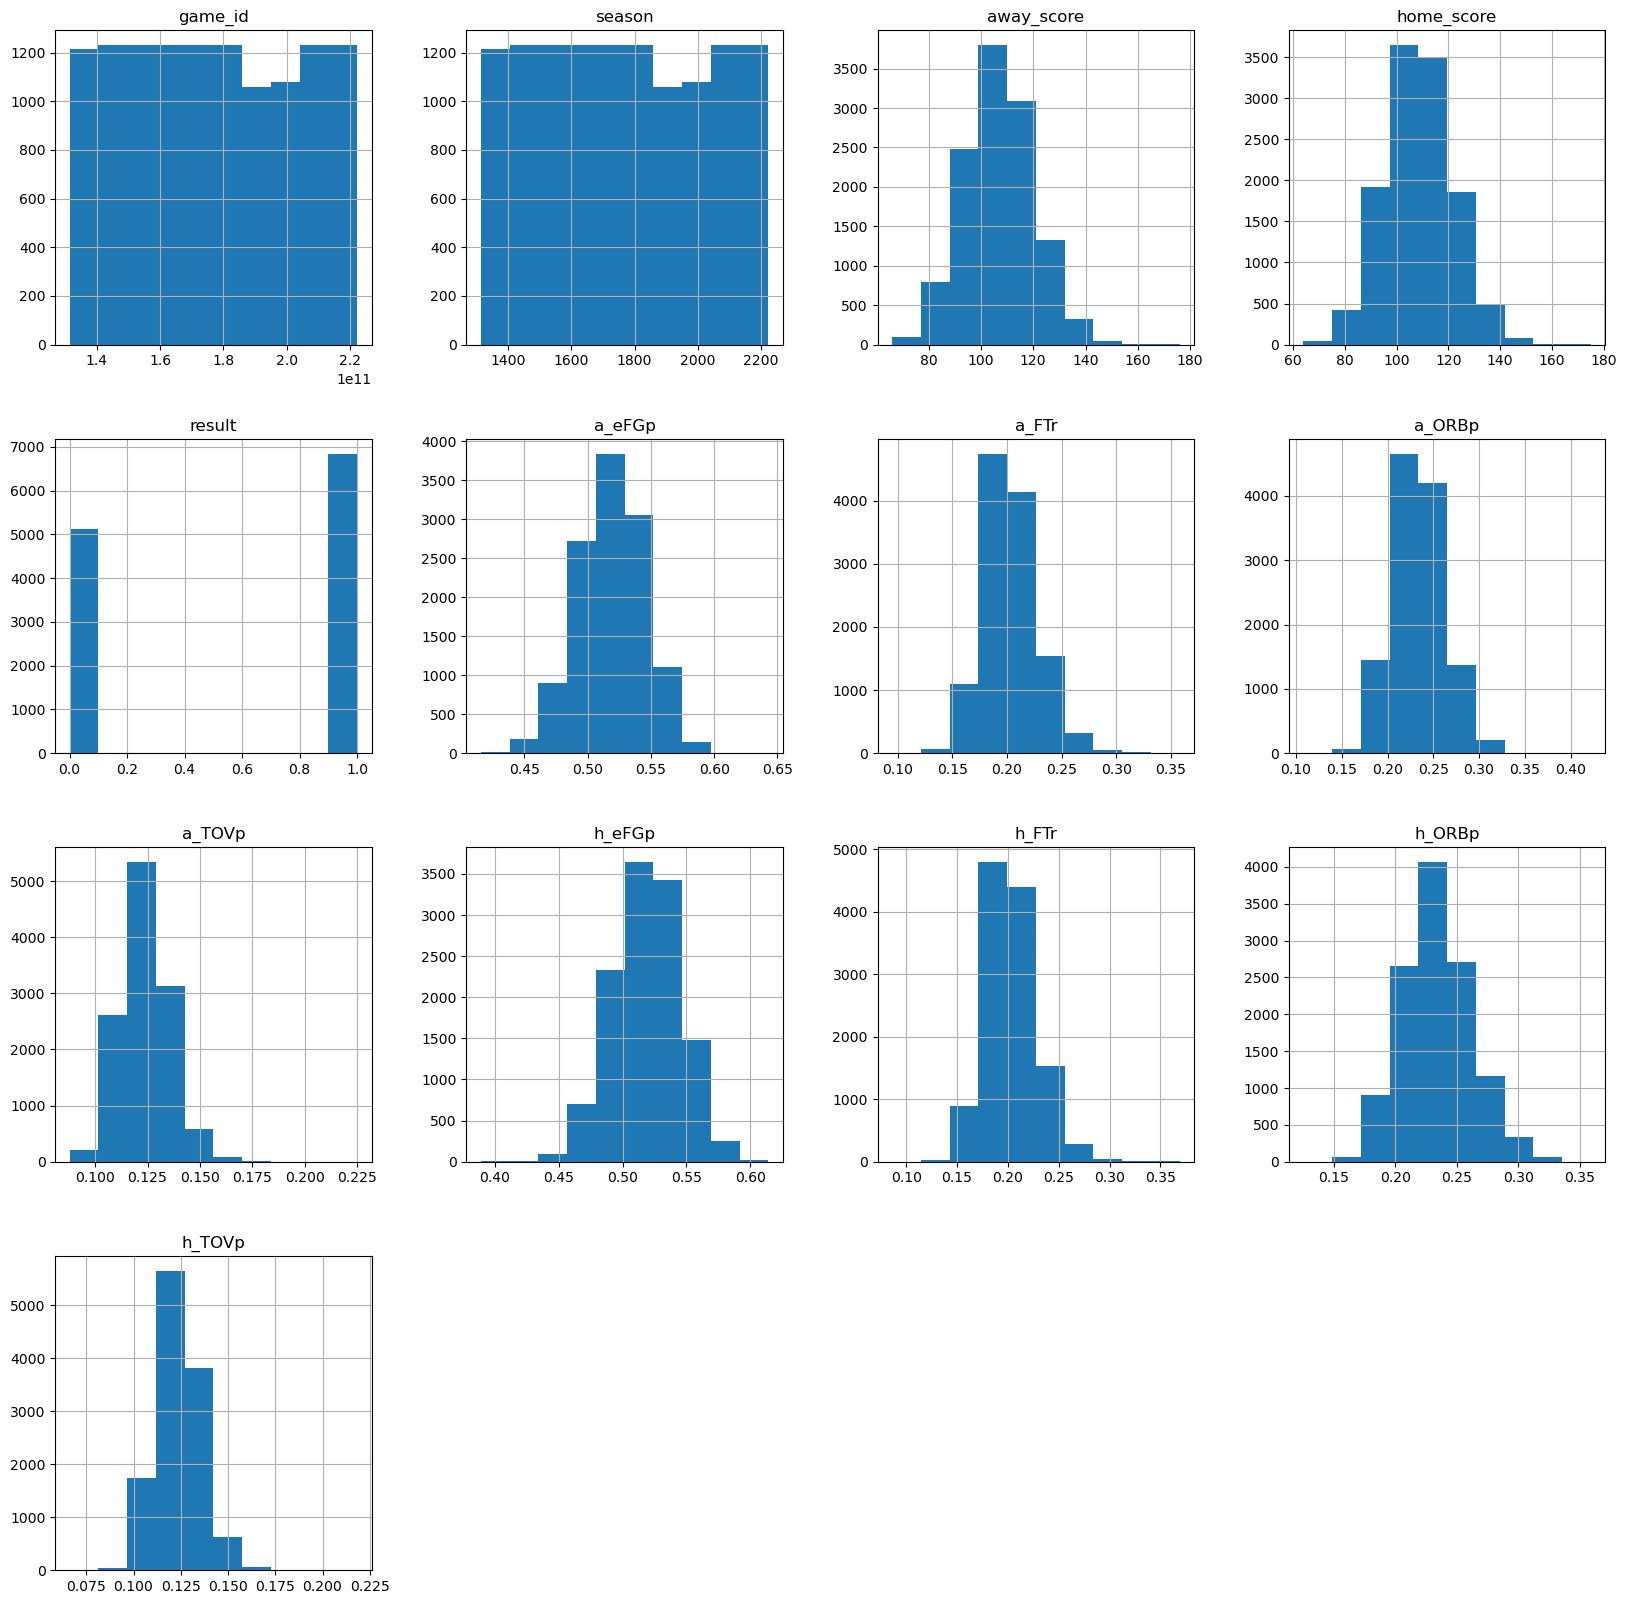

In [40]:
team_factor_30.dropna(inplace=True)
team_factor_30.reset_index(drop=True, inplace=True)
team_factor_30.hist(figsize=(20,20));

In [41]:
team_factor_30['eFGp'] = team_factor_30['a_eFGp'] - team_factor_30['h_eFGp']
team_factor_30['FTr'] = team_factor_30['a_FTr'] - team_factor_30['h_FTr']
team_factor_30['ORBp'] = team_factor_30['a_ORBp'] - team_factor_30['h_ORBp']
team_factor_30['TOVp'] = team_factor_30['a_TOVp'] - team_factor_30['h_TOVp']

# results_df = pd.DataFrame(columns=['model_name', 'cv_score', 'gs_score', 'train_score', 'test_score'])
residuals_df_30 = pd.DataFrame(columns=['y_true'])
residuals_df_30['y_true'] = game_info['result']

In [42]:
stat_columns = ['eFGp', 'FTr', 'ORBp', 'TOVp', 'season']

X = team_factor_30[stat_columns]
y = team_factor_30['result']

stats = train_test_split(X, y, train_size=.80, random_state=seed)

#### Logistic Regression

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var_10,0.600230,NaN,0.607441,0.598412
1,log_4F_10,0.610995,NaN,0.615907,0.607188
2,log_gs_4F_10,NaN,0.617893,0.618834,0.619306
3,knn_4F_10,NaN,0.587897,0.645694,0.600919
4,rfc_4F_10,NaN,0.620297,0.636601,0.610531
5,gnb_4F_10,0.613921,None,0.617057,0.610949
6,svc_4F_10,NaN,0.618207,0.626359,0.608023
7,log_gs_4F_20,NaN,0.629911,0.629494,0.620560
8,knn_4F_20,NaN,0.603992,0.651442,0.593397
9,rfc_4F_20,NaN,0.630538,0.657086,0.617217


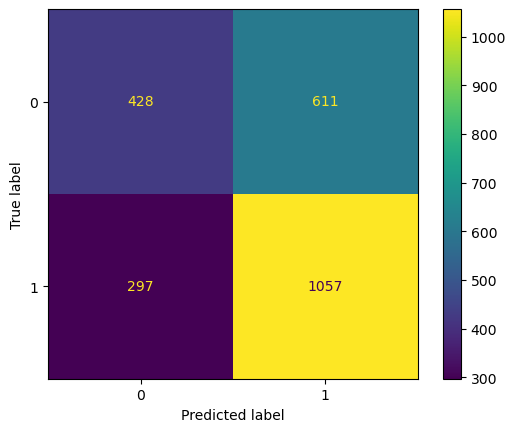

In [43]:
log_gs = LogisticRegression(solver='saga', random_state=seed)
log_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1.0,],
}

log_gs_model = ModelEval(log_gs, 'log_gs_4F_30', results_df, residuals_df_30, stats, log_param_grid, scaler='yes')
log_gs_model.full_diag()

results_df

In [44]:
log_gs_model.params_model

LogisticRegression(penalty='l1', random_state=99, solver='saga')

#### KNN

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var_10,0.600230,NaN,0.607441,0.598412
1,log_4F_10,0.610995,NaN,0.615907,0.607188
2,log_gs_4F_10,NaN,0.617893,0.618834,0.619306
3,knn_4F_10,NaN,0.587897,0.645694,0.600919
4,rfc_4F_10,NaN,0.620297,0.636601,0.610531
5,gnb_4F_10,0.613921,None,0.617057,0.610949
6,svc_4F_10,NaN,0.618207,0.626359,0.608023
7,log_gs_4F_20,NaN,0.629911,0.629494,0.620560
8,knn_4F_20,NaN,0.603992,0.651442,0.593397
9,rfc_4F_20,NaN,0.630538,0.657086,0.617217


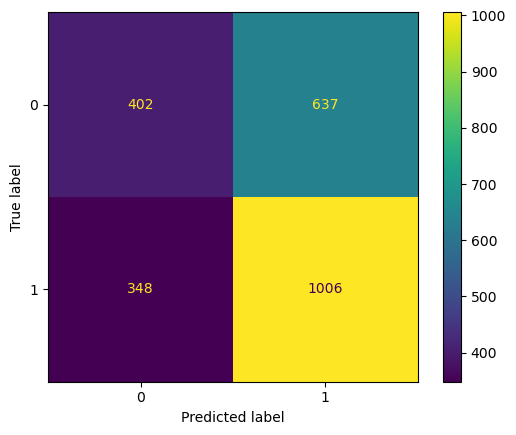

In [45]:
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [15, 17, 19],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

knn_model = ModelEval(knn, 'knn_4F_30', results_df, residuals_df_30, stats, knn_param_grid, scaler='yes')
knn_model.full_diag()

results_df

In [46]:
knn_model.params_model

KNeighborsClassifier(n_neighbors=19, p=1)

#### RF

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var_10,0.600230,NaN,0.607441,0.598412
1,log_4F_10,0.610995,NaN,0.615907,0.607188
2,log_gs_4F_10,NaN,0.617893,0.618834,0.619306
3,knn_4F_10,NaN,0.587897,0.645694,0.600919
4,rfc_4F_10,NaN,0.620297,0.636601,0.610531
5,gnb_4F_10,0.613921,None,0.617057,0.610949
6,svc_4F_10,NaN,0.618207,0.626359,0.608023
7,log_gs_4F_20,NaN,0.629911,0.629494,0.620560
8,knn_4F_20,NaN,0.603992,0.651442,0.593397
9,rfc_4F_20,NaN,0.630538,0.657086,0.617217


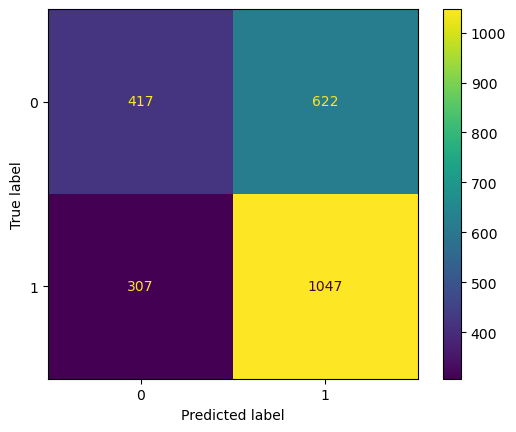

In [47]:
rfc = RandomForestClassifier(random_state=seed)
rfc_param_grid = {
    'criterion': ['gini'],
    'n_estimators': [175, 200, 225],
    'max_depth': [5, 7, 9],
    'min_samples_split': [2],
    'min_samples_leaf': [3, 4, 5],
    'max_features': ['sqrt', None]
}

rfc_model = ModelEval(rfc, 'rfc_4F_30', results_df, residuals_df_30, stats, rfc_param_grid)
rfc_model.full_diag()

results_df

In [48]:
rfc_model.params_model

RandomForestClassifier(max_depth=7, max_features=None, min_samples_leaf=3,
                       n_estimators=200, random_state=99)

#### GNB

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var_10,0.600230,NaN,0.607441,0.598412
1,log_4F_10,0.610995,NaN,0.615907,0.607188
2,log_gs_4F_10,NaN,0.617893,0.618834,0.619306
3,knn_4F_10,NaN,0.587897,0.645694,0.600919
4,rfc_4F_10,NaN,0.620297,0.636601,0.610531
5,gnb_4F_10,0.613921,None,0.617057,0.610949
6,svc_4F_10,NaN,0.618207,0.626359,0.608023
7,log_gs_4F_20,NaN,0.629911,0.629494,0.620560
8,knn_4F_20,NaN,0.603992,0.651442,0.593397
9,rfc_4F_20,NaN,0.630538,0.657086,0.617217


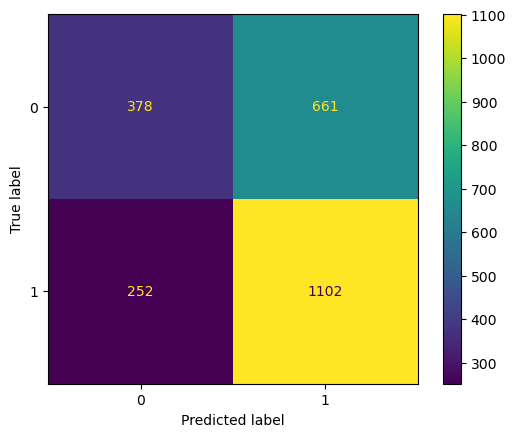

In [49]:
gnb = GaussianNB()
gnb_model = ModelEval(gnb, 'gnb_4F_30', results_df, residuals_df_30, stats, None)
gnb_model.full_diag()

results_df

#### SVC

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var_10,0.600230,NaN,0.607441,0.598412
1,log_4F_10,0.610995,NaN,0.615907,0.607188
2,log_gs_4F_10,NaN,0.617893,0.618834,0.619306
3,knn_4F_10,NaN,0.587897,0.645694,0.600919
4,rfc_4F_10,NaN,0.620297,0.636601,0.610531
5,gnb_4F_10,0.613921,None,0.617057,0.610949
6,svc_4F_10,NaN,0.618207,0.626359,0.608023
7,log_gs_4F_20,NaN,0.629911,0.629494,0.620560
8,knn_4F_20,NaN,0.603992,0.651442,0.593397
9,rfc_4F_20,NaN,0.630538,0.657086,0.617217


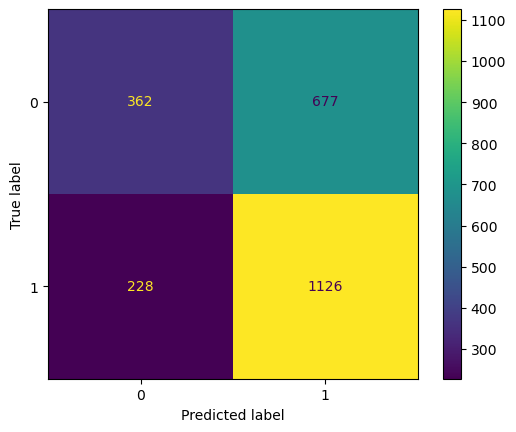

In [50]:
svc = SVC(random_state=seed)

svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svc_model = ModelEval(svc, 'svc_4F_30', results_df, residuals_df_30, stats, svc_param_grid, scaler='yes')
svc_model.full_diag()

results_df

In [51]:
svc_model.params_model

SVC(C=1, gamma='auto', random_state=99)

The results from the 30-game dataset are mixed. Some models did slightly better, and others did slightly worse, which matches my expectations. Since model performance is still below the target of 68% accuracy, I will attempt to model on the other datasets as well before deciding how to proceed.

### Principal Component Analysis (PCA)

PCA involves reducing the dimensionality of the dataset while retaining as much of the information as possible. I will use the full dataset, which has 58 features. This includes all traditional and advanced boxscore statistics. Some of these features are colinear, and others are less likely to be effective for modeling. Instead of trying to systematically test each feature, I will utilize PCA, which performs linear transformations on the features. One downside of this is that the resulting features are not as immediately discernible since they do not correspond to a single statistic. They are instead transformations of the original feature set. Still, the resulting features will hopefully prove to be effective for modeling. Since the focus of this project is predictive analysis, as opposed to inferential or descriptive analysis, PCA is a suitable choice.

After some testing, I settled on `n_components=10`, which means that PCA will reduce the feature count and keep the best 10 new features. Keeping additional components increases the overall sum of explained variance, but the diminishing returns from each additional component means that the overall contribution is minimal.

In [52]:
team_full_20

,game_id,season,date,away_team,away_score,home_team,home_score,result,a_FG,a_FGA,a_FGp,a_3P,a_3PA,a_3Pp,a_FT,a_FTA,a_FTp,a_ORB,a_DRB,a_TRB,a_AST,a_STL,a_BLK,a_TOV,a_PF,a_PTS,a_TSp,a_eFGp,a_3PAr,a_FTr,a_ORBp,a_DRBp,a_TRBp,a_ASTp,a_STLp,a_BLKp,a_TOVp,h_FG,h_FGA,h_FGp,h_3P,h_3PA,h_3Pp,h_FT,h_FTA,h_FTp,h_ORB,h_DRB,h_TRB,h_AST,h_STL,h_BLK,h_TOV,h_PF,h_PTS,h_TSp,h_eFGp,h_3PAr,h_FTr,h_ORBp,h_DRBp,h_TRBp,h_ASTp,h_STLp,h_BLKp,h_TOVp
0,131410290001,1314,2013-10-29,ORL,87,IND,97,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,131410290002,1314,2013-10-29,CHI,95,MIA,107,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,131410290003,1314,2013-10-29,LAC,103,LAL,116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,131410300004,1314,2013-10-30,BRK,94,CLE,98,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,131410300005,1314,2013-10-30,BOS,87,TOR,93,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11974,222304091226,2223,2023-04-09,UTA,117,LAL,128,1,42.60,90.70,0.47090,11.30,34.15,0.32895,18.95,24.50,0.78135,11.85,37.15,49.00,26.40,5.15,6.00,15.25,19.85,115.45,0.57035,0.53335,0.37760,0.27220,26.085,79.330,53.455,61.940,5.010,11.225,13.105,41.75,86.15,0.48590,11.45,31.00,0.36950,22.10,28.35,0.77915,10.70,34.95,45.65,25.20,6.40,4.70,13.75,16.55,117.05,0.59490,0.55275,0.36035,0.33430,25.150,76.800,51.830,60.475,6.470,8.005,12.225
11975,222304091227,2223,2023-04-09,NOP,108,MIN,113,1,41.70,85.25,0.48935,12.00,29.55,0.40445,18.35,22.15,0.83635,9.10,33.30,42.40,26.85,7.35,4.15,13.40,19.70,113.75,0.59895,0.55930,0.34625,0.26255,22.615,78.270,51.505,64.235,7.595,8.440,12.345,43.25,88.90,0.48655,12.85,32.65,0.38960,16.80,23.85,0.70280,9.40,34.10,43.50,28.35,7.70,5.65,13.40,20.70,116.15,0.58385,0.55895,0.36755,0.27040,21.240,76.535,49.115,65.430,7.595,9.405,11.860
11976,222304091228,2223,2023-04-09,MEM,100,OKC,115,1,45.10,91.15,0.49390,14.45,37.70,0.37950,16.20,21.10,0.76275,9.90,33.55,43.45,28.45,7.95,4.95,12.00,20.05,120.85,0.60220,0.57320,0.41535,0.23260,22.735,76.355,49.665,63.075,7.850,9.585,10.655,41.70,91.85,0.45405,11.95,35.20,0.33895,21.25,25.60,0.83435,11.10,31.75,42.85,23.15,8.35,2.75,11.20,20.05,116.60,0.56515,0.51885,0.38285,0.28235,24.340,73.755,48.455,55.740,8.295,5.350,9.810
11977,222304091229,2223,2023-04-09,LAC,119,PHO,114,0,43.25,86.20,0.50325,13.20,33.35,0.38875,20.15,25.25,0.78660,9.25,32.70,41.95,27.15,8.10,3.90,14.30,19.60,119.85,0.61595,0.58010,0.38725,0.29405,22.060,74.800,49.295,62.720,8.100,6.675,12.760,43.50,91.10,0.47940,11.70,32.30,0.35535,17.30,21.75,0.80215,11.55,33.05,44.60,27.55,6.70,6.35,11.70,21.85,116.00,0.57835,0.54455,0.35740,0.24130,25.815,77.880,51.535,63.335,6.795,12.130,10.415


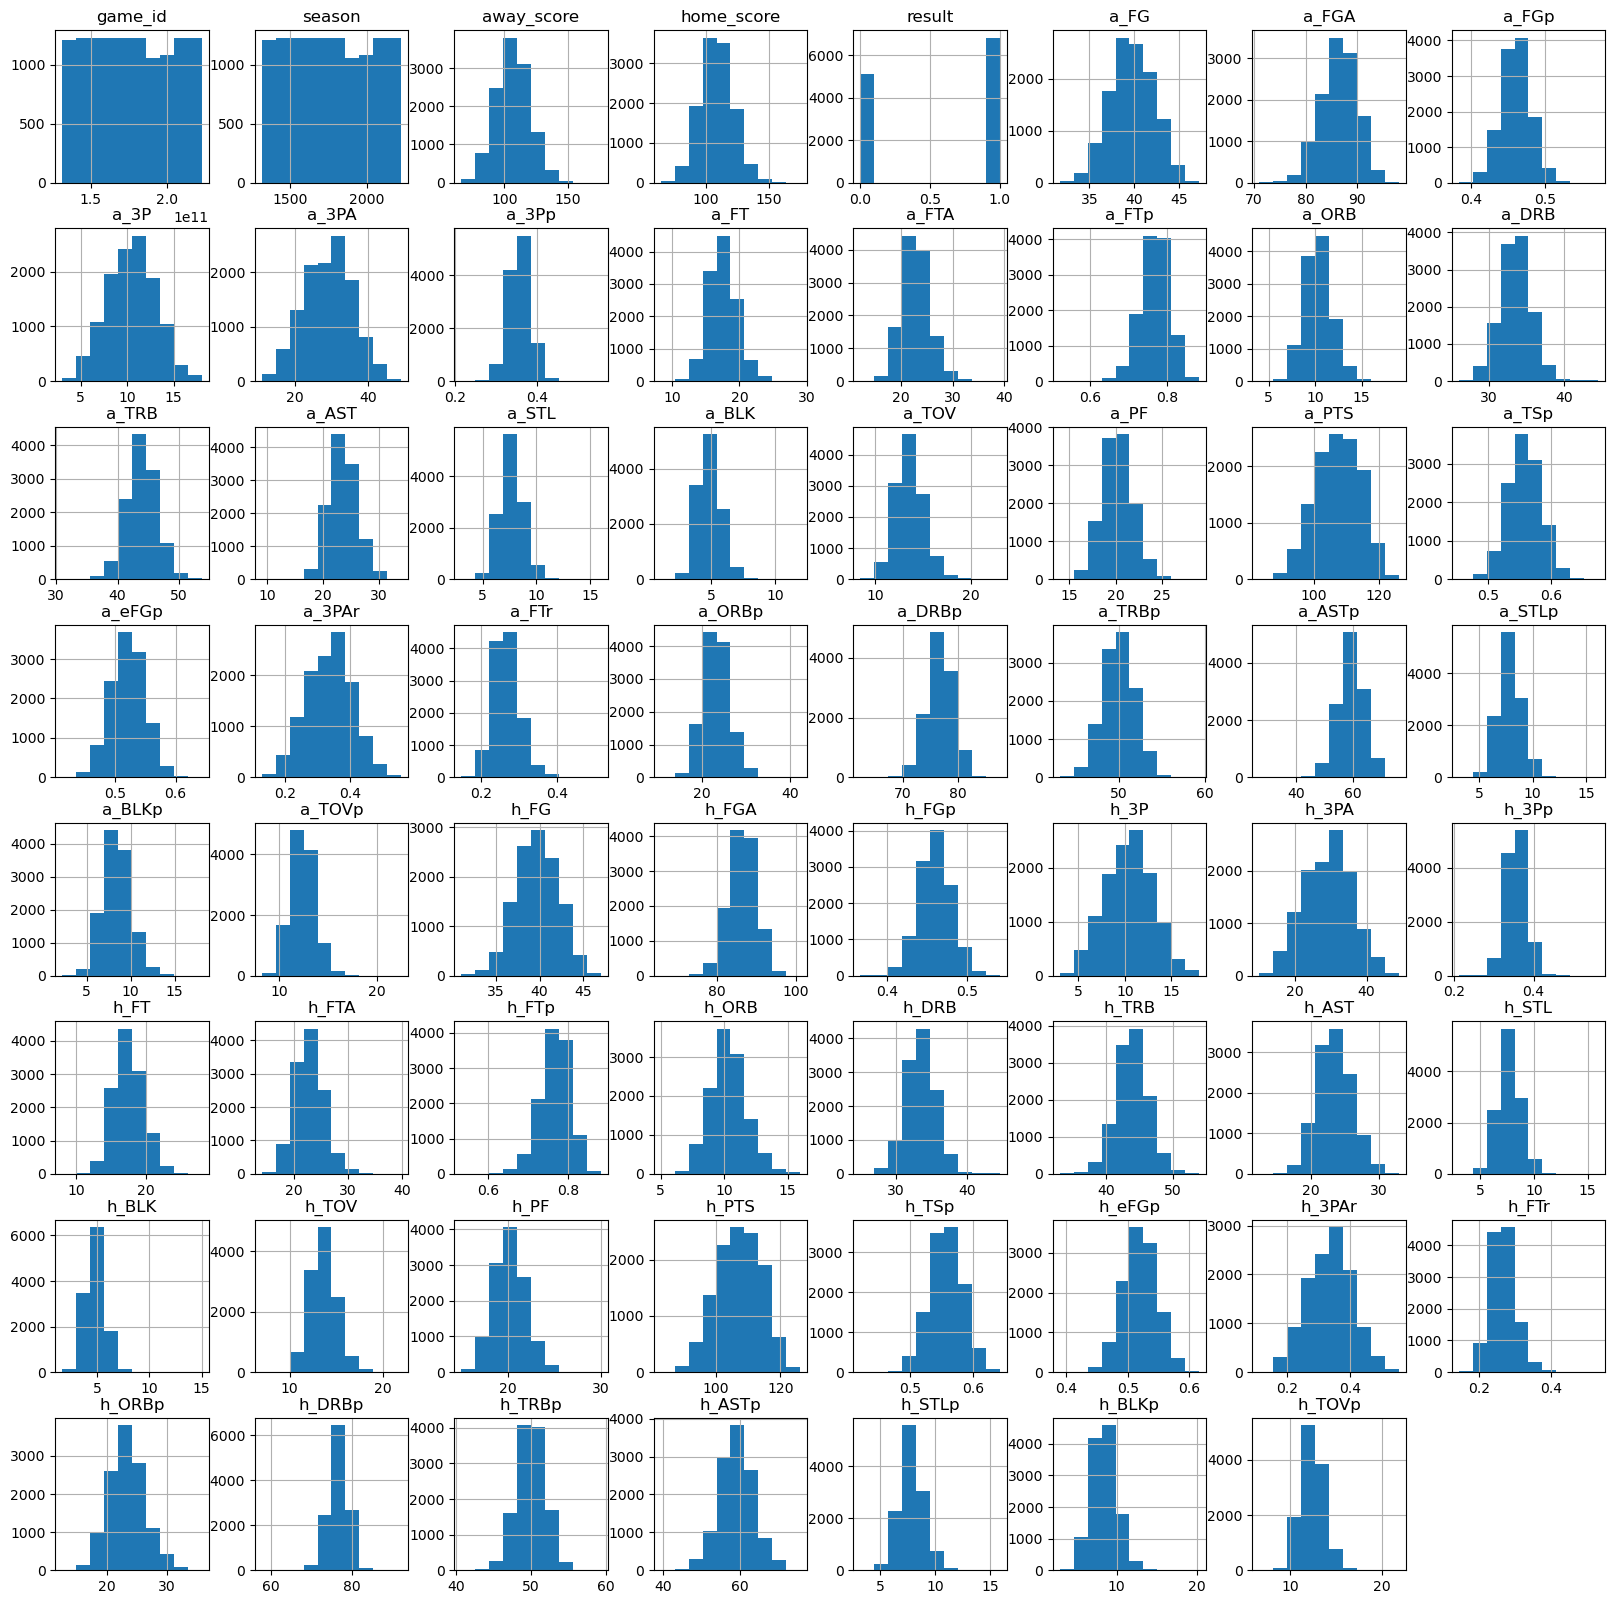

In [53]:
team_full_20.dropna(inplace=True)
team_full_20.reset_index(drop=True, inplace=True)
team_full_20.hist(figsize=(20,20));

In [54]:
stat_columns = team_full_20.loc[:,'a_FG':'h_TOVp'].columns

X = team_full_20[stat_columns]
y = team_full_20['result']

stats = train_test_split(X, y, train_size=.80, random_state=seed)

residuals_df_pca = pd.DataFrame(columns=['y_true'])
residuals_df_pca['y_true'] = team_full_20['result']

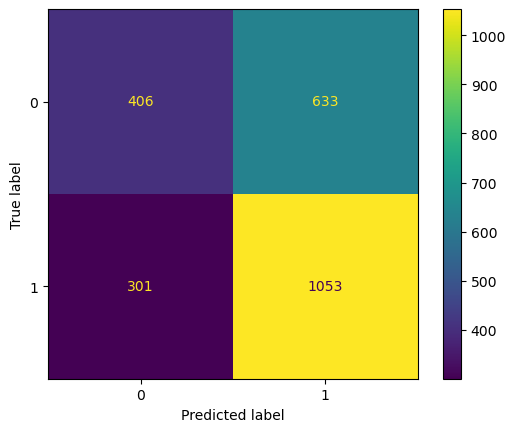

In [55]:
log_gs = LogisticRegression(solver='saga', random_state=seed)
log_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1.0],
}

log_pca = ModelEval(log_gs, 'log_pca', results_df, residuals_df_pca, stats, log_param_grid, pca='yes')
log_pca.full_diag()

In [56]:
log_pca.params_model

LogisticRegression(C=0.1, penalty='l1', random_state=99, solver='saga')

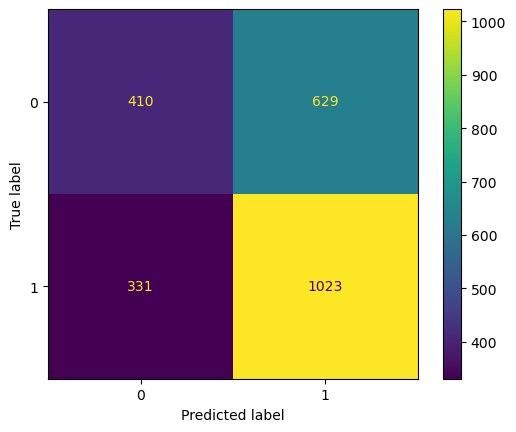

In [57]:
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [15, 17, 19],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

knn_pca = ModelEval(knn, 'knn_pca', results_df, residuals_df_pca, stats, knn_param_grid, pca='yes')
knn_pca.full_diag()

In [58]:
knn_pca.params_model

KNeighborsClassifier(n_neighbors=19, p=1)

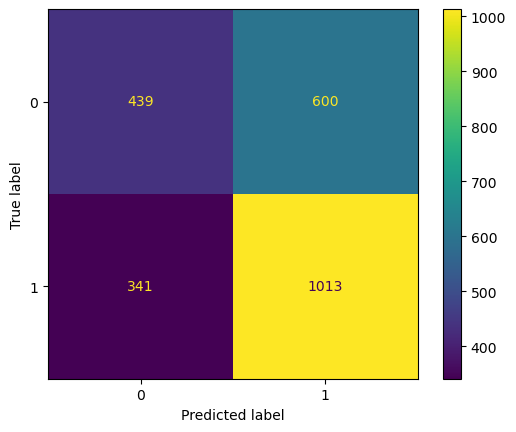

In [60]:
rfc = RandomForestClassifier(random_state=seed)
rfc_param_grid = {
    'criterion': ['gini'],
    'n_estimators': [250, 275, 300],
    'max_depth': [5, 7, 9],
    'min_samples_split': [2],
    'min_samples_leaf': [3, 4, 5],
    'max_features': ['sqrt', None]
}

rfc_pca = ModelEval(rfc, 'rfc_pca', results_df, residuals_df_pca, stats, rfc_param_grid, pca='yes')
rfc_pca.full_diag()

In [61]:
rfc_pca.params_model

RandomForestClassifier(max_depth=9, max_features=None, min_samples_leaf=5,
                       n_estimators=300, random_state=99)

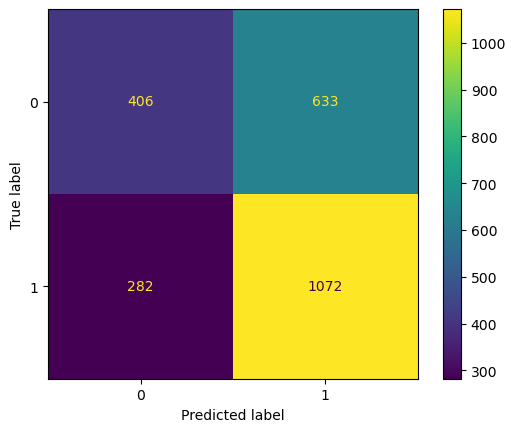

In [62]:
gnb = GaussianNB()
gnb_pca = ModelEval(gnb, 'gnb_pca', results_df, residuals_df_pca, stats, None, pca='yes')
gnb_pca.full_diag()

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var_10,0.600230,NaN,0.607441,0.598412
1,log_4F_10,0.610995,NaN,0.615907,0.607188
2,log_gs_4F_10,NaN,0.617893,0.618834,0.619306
3,knn_4F_10,NaN,0.587897,0.645694,0.600919
4,rfc_4F_10,NaN,0.620297,0.636601,0.610531
5,gnb_4F_10,0.613921,None,0.617057,0.610949
6,svc_4F_10,NaN,0.618207,0.626359,0.608023
7,log_gs_4F_20,NaN,0.629911,0.629494,0.620560
8,knn_4F_20,NaN,0.603992,0.651442,0.593397
9,rfc_4F_20,NaN,0.630538,0.657086,0.617217


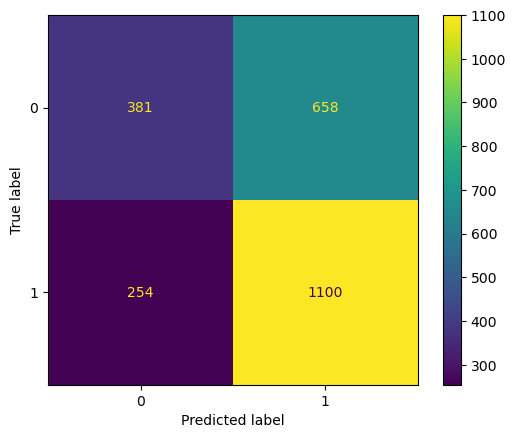

In [63]:
svc = SVC(random_state=seed)
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svc_pca = ModelEval(svc, 'svc_pca', results_df, residuals_df_pca, stats, svc_param_grid, pca='yes')
svc_pca.full_diag()

results_df

In [64]:
svc_pca.params_model

SVC(C=10, kernel='linear', random_state=99)

### Neural Network (NN)

Neural Networks are "black box" models, meaning that it is often impossible to determine how exactly the models arrive at their predictions. This is because the networks process chunks of the training data one at a time and determine their own associations between the features and the result. This process can be controlled to a degree by manipulating the model layers. For a simple explanation of NNs, see AWS's [What is a Neural Network](https://aws.amazon.com/what-is/neural-network/#:~:text=A%20neural%20network%20is%20a,that%20resembles%20the%20human%20brain.).

I will create a NN with both PCA data and the full dataset, since NNs are often better able to handle larger amounts of features. The data needs to be scaled with the `MinMaxScaler` to have all the data values bet ween 0 and 1. I will use the `Adam` optimizer and `binary-crossentropy` loss function since they are designed for binary classification tasks. Additionally, the final layer needs to have `sigmoid` activation so the model prediction will be binary.

In [65]:
stat_columns = team_full_20.loc[:,'a_FG':'h_TOVp'].columns

X = team_full_20[stat_columns]
y = team_full_20['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=seed)

In [66]:
# scale the data
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)
# perform PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [67]:
# explicitly set learning rate
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train_pca.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # sigmoid activation for binary classification

model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# set epochs and batch_size for model training
epochs = 30
batch_size = 16
# train the model
model.fit(X_train_pca, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

In [68]:
# calculate model test score
loss, accuracy = model.evaluate(X_test_pca, y_test, verbose=0)
# add model results to the results_df for comparison
nn_results = {'model_name': 'nn_pca', 'cv_score': None, 'gs_score': None, 'train_score': None, 'test_score': accuracy}
results_df = results_df.append(nn_results, ignore_index=True)

In [69]:
# explicitly set learning rate
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # sigmoid activation for binary classification

model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# set epochs and batch_size for model training
epochs = 30
batch_size = 16
# train the model
model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

In [70]:
# calculate model test score
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
# add model results to the results_df for comparison
nn_results = {'model_name': 'nn_full', 'cv_score': None, 'gs_score': None, 'train_score': None, 'test_score': accuracy}
results_df = results_df.append(nn_results, ignore_index=True)

The Neural Network results are underwhelming. The model tends to reach its maximum accuracy in relatively few epochs, which is possibly due to the relatively small dataset (at least by NN standards), a lack of distinguishing features, or too much colinearity within the data. Given the necessary computational costs and iteration that is required for creating a NN model, the performance is far too poor to consider this method moving forward.

I have tested all the machine learning modeling methods, but model performance is still far short of the target accuracy of 68%. Also, the similarity between the models means that there is no one model that stands out. The final method I will attempt is creating an Elo rating system, which is described in-depth below.

### Elo Rating System

The last step is to compare the current best models against an Elo rating system. Elo rating sytems, named for the creator Arpad Elo, are designed to rank competitors in head-to-head competitions. Originally designed for chess, the same principals can be used to create an Elo sytem that can rank NBA teams, albeit with a few adjustments. I decided to create a custom system based on the Elo system used by [FiveThirtyEight](https://fivethirtyeight.com/). They discuss their in-house system in an article [here](https://fivethirtyeight.com/features/how-we-calculate-nba-elo-ratings/), but there are several details missing and zero code, so I will need to write the code myself.

At its most basic, an Elo rating system has the following assumptions:

* all that is required is the competitors Elo ratings and the outcome of the competition.
* competitors always gain Elo points following a victory, and lose points following a loss.
* the system is zero-sum, meaning that the points gained by the victor will be equal to the points lost by the loser.

The FiveThirtyEight model, however, has other several features that I need to consider when creating my own system:

* margin of victory
* home-court advantage
* seasonal adjustments

In chess, the amount of rating points won/lost is determined by a fixed constant, $K$. The FTE (FiveThirtyEight) system uses margin of victory to adjust the amount of points won/lost. This means that winning by a large margin will earn more Elo points than winning by a small amount. Additionally, there is an adjustment to the "expected" outcome based on the home-court advantage. In the NBA, the home team traditionally has an advantage over the away team, so the Elo system accounts for this by giving the home team additional Elo points before calculating the expected outcome. And finally, each team's Elo rating is adjusted at the end of the season to revert the rankings back toward the mean. The "baseline" rating for this system is 1500, which represents the "average" team. Instead of a full reset, each team retains three-quarters of their Elo going into a new season. The FTE system technically uses 1505 as the seasonal adjustment baseline in order to account for league expansions and mergers. Even though there were no expansions and mergers during the timeframe my data covers, I still decided to use 1505 as the baseline.

The FTE model has an accuracy of 68% when looking at all professional games dating back to the 1940's. My data only covers games from the last ten years, and doesn't include playoff games, so I expect that the system performance will be slightly below the FTE model. Here is a brief mathematical description of the system I created, followed by the code used to implement it. This is the equation used to update a team's Elo rating after each game:

### $R_1 = R_0 + K(S-E)$

In the above equation, $R_0$ is the team's current Elo rating, $R_1$ is the team's Elo rating after the game, $K$ is the constant used to determine the magnitude of the rating change, $S$ is the score/result, and $E$ is the expected win probability.

The K-factor is typically set around 20-30, depending on the type of competition. A large K-factor leads to bigger point swings, which means it reacts much more quickly to recent performance. If the K-factor is too large, it will lead to large swings in rating and the ratings will fail to stabilize, resulting in a less accurate system. If the K-factor is too small, it will take the model too long to reflect a team's "true" rating and won't be able to respond quickly enough to changes in a team's performance. The FTE model uses a K-factor of 20, but also includes an adjustment that accounts for margin of victory, so the formula for looks like this:

## $K = \frac{20(MOV+3)^.8}{7.5 + 0.006(ED)}$

$MOV$ is the margin of victory (the difference in final score between the home and away team), and $ED$ is the difference in the two teams' Elo prior to the competition. The constants I have used match those used by FTE system. The result is a K factor that increases or decreases the amount of points gained/lost based on the margin of victory, but only up to a certain point. The assumption is that there is a pretty big difference betwen a 5-point win and a 15-point win, but there is less of a difference between a 25-point win and a 35-point win, so as the overall margin of victory grows, there are diminishing returns on the amount of extra rating points gained/lost.

$S$, as mentioned, is the score, or result, of the competition. In the case of basketball games, this is either 0 for a loss, or 1 for a win. $E$ is the expected win probability, which is defined as:

##  $E_a = \frac{1}{1+10^\frac{elo_b - elo_a}{400}}$

where $elo_a$ is the team's current elo and $elo_b$ is their opponent's current Elo. To see how Elo ratings affect the expected outcome, check out this [elo calculator](https://www.omnicalculator.com/sports/elo).

The only other adjustment is increasing the home team's  current Elo by 100 prior to the Elo calculation in order to account for the home court advantage. Now that we have everything we need to calculate Elo, here is what the code looks like:

In [71]:
def calc_K(MOV, elo_diff_winner):
    
    K = 20 * ( (MOV + 3)**0.8 / (7.5 + 0.006*(elo_diff_winner)) )
    return K

def new_season_elo_adj(elo):
    new_season_elo = (0.75*elo) + (0.25*1505)
    return new_season_elo

def update_elo(away_team, away_elo, away_score,
               home_team, home_elo, home_score):
    
    away_elo_og = away_elo
    home_elo_og = home_elo
    
    home_adv = 100
    home_elo += home_adv
    
    if away_score > home_score:
        
        winner_score = away_score
        winner_elo = away_elo
        
        loser_score = home_score
        loser_elo = home_elo
        
        S_away = 1
        S_home = 0
    else:
        winner = home_team
        winner_score = home_score
        winner_elo = home_elo
        
        loser_score = away_score
        loser_elo = away_elo
        S_away = 0
        S_home = 1
        
    elo_diff_winner = winner_elo - loser_elo
    
    E_away = 1 / (1 + 10**((home_elo-away_elo)/400))
    E_home = 1 / (1 + 10**((away_elo-home_elo)/400))
    
    MOV = winner_score - loser_score
    
    K = calc_K(MOV=MOV, elo_diff_winner=elo_diff_winner)
    
    away_elo_new = K*(S_away-E_away) + away_elo_og
    home_elo_new = K*(S_home-E_home) + home_elo_og
    
    return away_elo_new, home_elo_new

I used a dataset containing all historical Elo ratings from the FTE system, which can be found on github [here](https://github.com/rogerfitz/tutorials/tree/master/Nate%20Silver%20ELO), to set each team's initial Elo and verify my Elo calculations through the first season of my data (2013-2014).

In [72]:
# historical NBA elo ratings
nba_all_elo = pd.read_csv('https://raw.githubusercontent.com/luke-lite/NBA-Prediction-Modeling/main/data/nbaallelo.csv')
test_elo_season = nba_all_elo[(nba_all_elo['year_id'] == 2014) & (nba_all_elo['is_playoffs'] == 0)]
test_elo_season.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
121054,60528,201310290IND,NBA,1,2014,10/29/2013,1,0,ORL,Magic,87,1313.2317,1311.5338,22.266760,IND,Pacers,97,1583.5721,1585.2700,A,L,0.106039,NaN
121055,60528,201310290IND,NBA,0,2014,10/29/2013,1,0,IND,Pacers,97,1583.5721,1585.2700,49.365368,ORL,Magic,87,1313.2317,1311.5338,H,W,0.893961,NaN
121056,60529,201310290LAL,NBA,0,2014,10/29/2013,1,0,LAL,Lakers,116,1511.0200,1522.1942,42.866776,LAC,Clippers,103,1586.5884,1575.4142,H,W,0.535102,NaN
121057,60529,201310290LAL,NBA,1,2014,10/29/2013,1,0,LAC,Clippers,103,1586.5884,1575.4142,48.369659,LAL,Lakers,116,1511.0200,1522.1942,A,L,0.464898,NaN
121058,60530,201310290MIA,NBA,1,2014,10/29/2013,1,0,CHI,Bulls,95,1519.9124,1516.6088,42.281761,MIA,Heat,107,1691.8896,1695.1932,A,L,0.172841,NaN


In [73]:
# store each team's initial elo
first_game_df = test_elo_season[test_elo_season['seasongame'] == 1]
first_game_df['team_id'].replace('CHA', 'CHO', inplace=True)
initial_elo_df = first_game_df[['team_id', 'elo_i']]
initial_elo_df.head()

,team_id,elo_i
121054,ORL,1313.2317
121055,IND,1583.5721
121056,LAL,1511.0200
121057,LAC,1586.5884
121058,CHI,1519.9124


In [74]:
# instantiate dict with lists of elo changes per team per season
elo_dict = {}
for team_id in initial_elo_df['team_id']:
    # empty lists for each team each season
    elo_dict[team_id] = {season: [] for season in game_info['season'].unique()}
    # add starting elo into the first season for each team
    elo_dict[team_id][1314].append(initial_elo_df['elo_i'][initial_elo_df['team_id'] == team_id].iloc[0])

In [75]:
seasons = list(game_info['season'].unique())
# create new columns in game_info to store the elo changes
game_info[['away_elo_i', 'away_elo_n', 'home_elo_i', 'home_elo_n']] = None

for idx in game_info.index:
    # store current season to determine when to perform season rating adjustment
    curr_season = game_info.loc[idx]['season']
    # when current season list is empty, trigger season rating adjustment for away team
    if elo_dict[game_info.loc[idx,'away_team']][curr_season] == []:
        
        prev_season_idx = seasons.index(curr_season)-1
        prev_elo = elo_dict[game_info.loc[idx,'away_team']][seasons[prev_season_idx]][-1]
        new_season_elo = new_season_elo_adj(prev_elo)
        elo_dict[game_info.loc[idx,'away_team']][curr_season].append(new_season_elo)
    # when current season list is empty, trigger season rating adjustment for home team
    if elo_dict[game_info.loc[idx,'home_team']][curr_season] == []:
        
        prev_season_idx = seasons.index(curr_season)-1
        prev_elo = elo_dict[game_info.loc[idx,'home_team']][seasons[prev_season_idx]][-1]
        new_season_elo = new_season_elo_adj(prev_elo)
        elo_dict[game_info.loc[idx,'home_team']][curr_season].append(new_season_elo)
        
    # determine current elo before each game
    away_elo_current = elo_dict[game_info.loc[idx,'away_team']][curr_season][-1]
    home_elo_current = elo_dict[game_info.loc[idx,'home_team']][curr_season][-1]
    
    # update elo after each game
    away_elo_new, home_elo_new = update_elo(away_team = game_info.loc[idx,'away_team'],
                                            away_elo = away_elo_current,
                                            away_score = game_info.loc[idx,'away_score'],
                                            home_team = game_info.loc[idx,'home_team'],
                                            home_elo = home_elo_current,
                                            home_score = game_info.loc[idx,'home_score'])
    # store elos in game_info
    game_info['away_elo_i'][idx] = away_elo_current
    game_info['away_elo_n'][idx] = away_elo_new
    game_info['home_elo_i'][idx] = home_elo_current
    game_info['home_elo_n'][idx] = home_elo_new
    
    # store elos in elo_dict
    elo_dict[game_info.loc[idx,'away_team']][curr_season].append(away_elo_new)
    elo_dict[game_info.loc[idx,'home_team']][curr_season].append(home_elo_new)

Now that we have Elo updates for each NBA game, I can use them to predict the winner. All I need to do is predict a win for the team with the higher current Elo, after accounting for the home court advantage.

In [76]:
game_info['elo_pred'] = None
for idx in game_info.index:
    
    # predictions based on each team's current elo
    if game_info['away_elo_i'][idx] > game_info['home_elo_i'][idx]+100:
        game_info['elo_pred'][idx] = 0
    elif game_info['away_elo_i'][idx] < game_info['home_elo_i'][idx]+100:
        game_info['elo_pred'][idx] = 1
        
game_info.head()

,game_id,season,date,away_team,away_score,home_team,home_score,result,away_elo_i,away_elo_n,home_elo_i,home_elo_n,elo_pred
0,131410290001,1314,2013-10-29,ORL,87,IND,97,1,1313.2317,1311.533869,1583.5721,1585.269931,1
1,131410290002,1314,2013-10-29,CHI,95,MIA,107,1,1519.9124,1516.608783,1691.8896,1695.193217,1
2,131410290003,1314,2013-10-29,LAC,103,LAL,116,1,1586.5884,1575.414216,1511.02,1522.194184,1
3,131410300004,1314,2013-10-30,BRK,94,CLE,98,1,1548.4365,1540.172399,1369.2823,1377.546401,0
4,131410300005,1314,2013-10-30,BOS,87,TOR,93,1,1484.9615,1479.784941,1483.9835,1489.160059,1


In [77]:
# calculate elo accuracy
residuals = game_info['result'] - game_info['elo_pred']
accuracy = len(residuals[residuals==0]) / len(residuals)
accuracy

0.6528925619834711

In [78]:
# store elo results in the results_df
elo_results = {'model_name': 'elo', 'cv_score': None, 'gs_score': None, 'train_score': None, 'test_score': accuracy}
results_df = results_df.append(elo_results, ignore_index=True)
results_df

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var_10,0.600230,NaN,0.607441,0.598412
1,log_4F_10,0.610995,NaN,0.615907,0.607188
2,log_gs_4F_10,NaN,0.617893,0.618834,0.619306
3,knn_4F_10,NaN,0.587897,0.645694,0.600919
4,rfc_4F_10,NaN,0.620297,0.636601,0.610531
5,gnb_4F_10,0.613921,None,0.617057,0.610949
6,svc_4F_10,NaN,0.618207,0.626359,0.608023
7,log_gs_4F_20,NaN,0.629911,0.629494,0.620560
8,knn_4F_20,NaN,0.603992,0.651442,0.593397
9,rfc_4F_20,NaN,0.630538,0.657086,0.617217


In [79]:
factor_10_results = results_df[2:7]
factor_20_results = results_df[7:12]
factor_30_results = results_df[12:17]
factor_10_avg = factor_10_results['test_score'].mean()
factor_20_avg = factor_20_results['test_score'].mean()
factor_30_avg = factor_30_results['test_score'].mean()
print(factor_10_avg, factor_20_avg, factor_30_avg)

0.6099456748850816 0.6131216046803176 0.6122022565816966


The Elo model is significantly better than every machine learning model, beating the next best model by about 3%.

## Results

Now that all the models have been tested, here are the top 10 models by `test_score`:

In [80]:
results_df.sort_values('test_score', ascending=False)

,model_name,cv_score,gs_score,train_score,test_score
24,elo,NaN,None,NaN,0.652893
23,nn_full,NaN,None,NaN,0.633514
16,svc_4F_30,NaN,0.630643,0.641722,0.621814
7,log_gs_4F_20,NaN,0.629911,0.629494,0.620560
11,svc_4F_20,NaN,0.630852,0.631166,0.620560
12,log_gs_4F_30,NaN,0.630225,0.631375,0.620560
2,log_gs_4F_10,NaN,0.617893,0.618834,0.619306
21,svc_pca,NaN,0.623118,0.625732,0.618888
22,nn_pca,NaN,None,NaN,0.618471
15,gnb_4F_30,0.627403,None,0.625209,0.618471


In [81]:
top_10 = results_df.sort_values('test_score', ascending=False)[0:10].reset_index(drop=True)
top_10['test_score'] = round(top_10['test_score']*100, 1)
top_10.rename(columns={'test_score': 'test_accuracy'}, inplace=True)
top_10[['model_name', 'test_accuracy']]

,model_name,test_accuracy
0,elo,65.3
1,nn_full,63.4
2,svc_4F_30,62.2
3,log_gs_4F_20,62.1
4,svc_4F_20,62.1
5,log_gs_4F_30,62.1
6,log_gs_4F_10,61.9
7,svc_pca,61.9
8,nn_pca,61.8
9,gnb_4F_30,61.8


There were incremental improvements moving from 10-game averages to 20-game averages, but as mentioned earlier, the machine learning models all behaved similarly, with a tendency to favor the home team (false-positives), and each had similar seasonal error distribution. Because of this, an ensemble model is unlikely to see large improvements in accuracy. Ultimately, my recommendation is for Stat-Ball to use the Elo rating system. It was the most accurate model, while also requiring the least amount of data and computation. In fact, it is 3% higher than the next closest model. For perspective, here is a plot of the top 5 models:

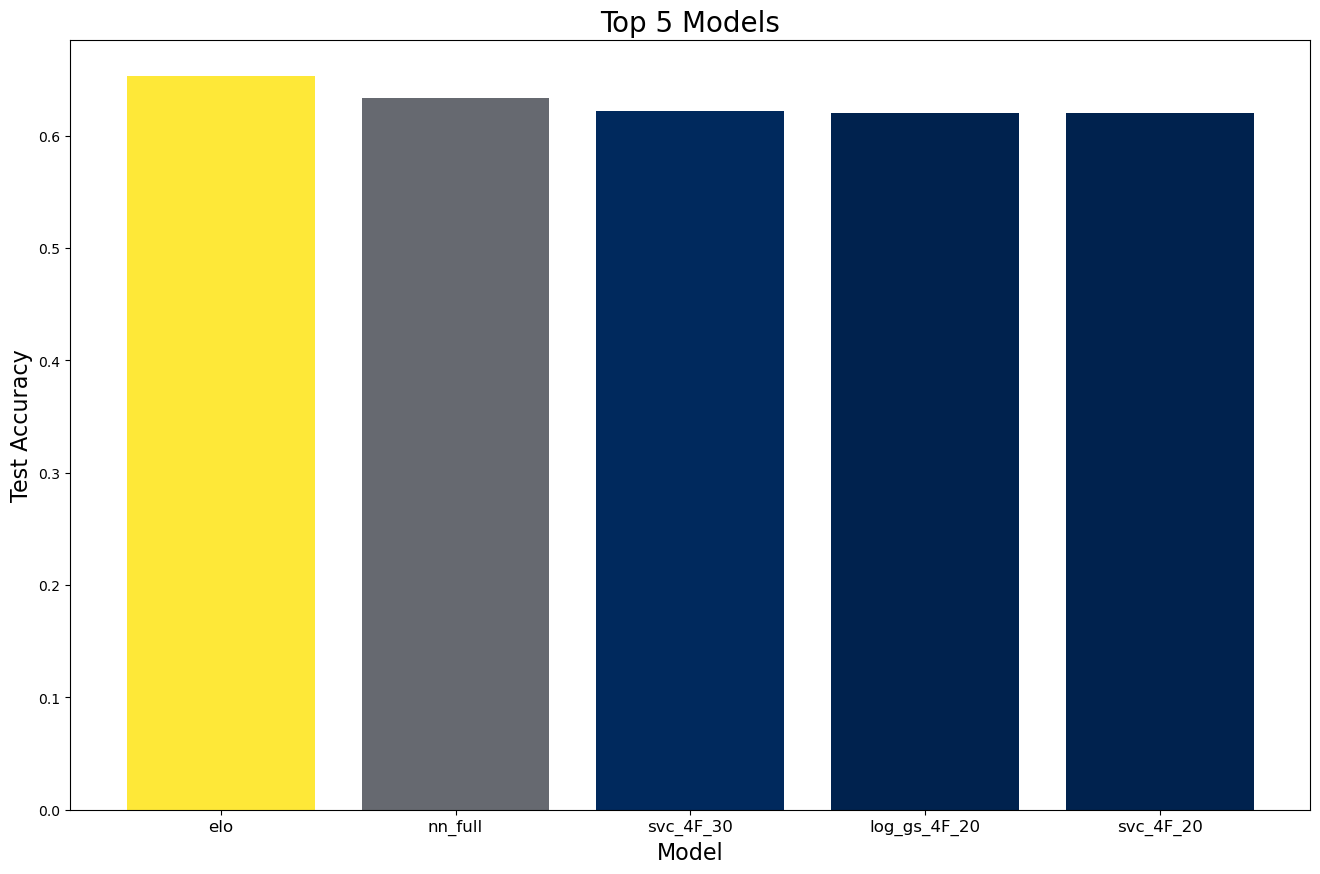

In [95]:
top_models = results_df[['model_name', 'test_score']].sort_values('test_score', ascending=False)[0:5]

cmap = plt.get_cmap("cividis")
heights = list(top_models['test_score'])
# rescale = lambda z: (z - np.min(z)) / (np.max(z) - np.min(z))
rescale = lambda z: (z - np.min(z)) / (np.max(z) - np.min(z))

fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title('Top 5 Models', fontsize=20)
ax.set_xlabel('Model', fontsize=16)
ax.set_ylabel('Test Accuracy', fontsize=16)
ax.set_xticks(range(len(top_models)))
ax.set_xticklabels(top_models['model_name'], fontsize=12)

# plot error per game by season
plt.bar(x=range(len(top_models)), height=top_models['test_score'], color=cmap(rescale(top_models['test_score'])));

## Conclusion

My final recommendation for Stat-Ball is to implement the Elo rating system. It is fast and effificient, and will do a good job of serving as a benchmark for the site users to compete against.

Overall, the project was a success. I was able to collect the data, create and compare models and datasets, and select a model suitable for the stakeholder, even though the results did not meet the original goal of 68% accuracy.

## Next Steps

Even though the models fell short of the original goal, there are several promising leads for future iterations of this project:

* more extensive data collection
* player aggregated data
* additional model adjustments

### Data Collection
It is likely that all models would benefit from additional data collection. Machine learning datasets typcially handle extremely large datasets well, so the additional information may lead to improvements in performance, particularly for the more complex models like the Neural Network. I plan to add an additional decade of boxscore data in the future. There are also opportunities for feature engineering that may better capture the information in the raw dataset, such as advanced statistics like PIE (Player Impact Estimate) and BPM (Box Plus/Minus). 

### Player Aggregated Data
As discussed before, player aggregated data has several benefits over team aggregated data. In particular, it has the ability to respond more quickly to roster changes, which could lead to significant improvements in accuracy at the beginning of each season. Player aggregation also allows for the possibility of creating predictive player metrics that can predict how a player will perform based on past performance and current teammates and opponents. For an example of how this would work in practice, see [How Our RAPTOR Metric Works](https://fivethirtyeight.com/features/how-our-raptor-metric-works/). FiveThrityEight's RAPTOR metric utilizes player tracking data in addition to boxscore data and is highly sophisticated, but it is possible to create a more simplified version based on the data I have available.

### Additional Model Adjustments
Assuming that additional data will help improve the machine learning models, there is a good chance that a custom-built ensemble method that also incorporates the Elo rating system will outperform the Elo system alone. I can also adjust the current Elo system to increase its complexity. The only adjustments it currently makes are home-court advantage and margin of victory. Other possible adjustments include back-to-back games, road trips, and even the elevation at which games are played. These additional features could also further improve the individual machine learning models.